# MET2010 Eksamen

##### Kandidatnummer: 10027

## Innledning

Jeg har i denne åpne oppgaven valgt å se på variabler som påvirker helsesektoren. Originalt ønsket jeg å takle et datasett med en rekke variabler om ulike dødsårsaker. Jeg fant så flere datasett som så på ulike lands utgifter til helsesektoren under denne artikkelen fant jeg flere interessante variabler som jeg valgte å utforske mer. Jeg endte med å velge forventet levealder `Life_expectancy` som er en gjennomsnittsvariabel som baserer seg på hvor lenge en person fra et gitt land kan forvente å leve. Variabelen inkluderer en rekke parametere og tar høyde for alle sykdommer, ulykker og lignende som kan påfalle. Historisk har forventet levealder hatt en positiv utvikling, dette er rimelig gitt den globale teknologiske utviklingen vi har hatt, særlig i vestlige land. Det finnes en rekke forhold som vi kan anta er med på å forklare denne økningen. Jeg har i denne oppgaven forsøkt å inkludere noen av disse forholdene som variabler.

Problemstillingen jeg har valgt å se på er: <br>
*Hvilken effekt investering i helsevesen har på forventet levealder?*

Alle datasettene som er benyttet i denne oppgaven er hentet fra nettsiden Ourworldindata.org. Denne nettsiden er åpen og har lett tilgjengelig data og kilder, og skriver lengre artikler om temaene de undersøker. Jeg har trukket ut data fra en rekke rapporter fra nettsiden og har forsøkt å bruke variabler fra ulike tematikker for å forklare forventet levealder. Totalt benyttet jeg 16 datasett. Fra disse plukket jeg ut de variablene jeg mente var mest relevante, som utgjorde 25 variabler. Dataene baserer seg på tidsperioden 2000-2019, som ikke er en veldig lang tidsperiode, men burde gi god informasjon om variablene og deres forhold. Dataen er hentet fra 193 land.

I oppgaven benytter jeg ulike regresjonsmodeller som har som formål å måle sammenhengen mellom utgifter til helsevesen og forventet levealder. Jeg benytter både enkle og multiple regresjonsmodeller i analysen, i tillegg til disse gjennomfører jeg en ARIMA modell som er en tidsrekkeregresjon, der jeg kan se på sammenhengen mellom variablene over tid.

Analysene som gjennomføres viser en sammenheng mellom de to variablene og både gjennom enkel-, multippel- og tidsrekkeregresjon får vi resultater som viser en positiv korrelasjon. Jeg konkluderer ikke i en bestemt tallverdi for denne sammenhengen, likevel får jeg fastsatt tilstedeværelse av korrelasjon og årsakssammenheng. Gjennom oppgaven ser vi på ulike grunner til dette og utforsker flere interessante tolkninger og analyser som belyser forholdene mellom oppgavens variabler.


## Data håndetering

In [1]:
# Importerer nødvendige pakker og setter ulike parametere for figurer og tabeller under oppgaven
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

import statsmodels as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import sklearn 
from patsy.builtins import *

from cycler import cycler

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)

In [2]:
# Henter inn sentrale datasett for oppgavem og slår disse sammen
public_share = pd.read_csv("public_expend_share_healthcare.csv")
public_hc_expend = pd.read_csv("public_healthcare_expend_share_gdp.csv")
hc_per_capita = pd.read_csv("healthcare_expend_per_capita.csv")
total_hc_expend = pd.read_csv("total_healthcare_expend_gdp.csv")
life_expect = pd.read_csv("life expect vs hc expend 2000-2019.csv")

healthcare = pd.merge(total_hc_expend,public_share, how="left", on=["Entity", "Code", "Year"])
healthcare = pd.merge(healthcare,public_hc_expend, how="left", on=["Entity", "Code", "Year"])
healthcare = pd.merge(healthcare, hc_per_capita, how="left", on=["Entity", "Code", "Year"])
healthcare = pd.merge(healthcare, life_expect, how="left", on=["Entity", "Code", "Year"])

# Henter resterende datasett 
work_hours = pd.read_csv("annual-working-hours-per-worker.csv")
child_mortality = pd.read_csv("Child death vs hc expend.csv")
democracy = pd.read_csv("democracy.csv")
terrorism  = pd.read_csv("fatalities-from-terrorism.csv")
gdp_per_capita = pd.read_csv("Gdp_per_capita.csv")
homicide = pd.read_csv("homicide-rate.csv")
HDI = pd.read_csv("human-development-index.csv")
schooling = pd.read_csv("mean-years-of-schooling-long-run.csv")
energy_access = pd.read_csv("share-of-the-population-with-access-to-electricity.csv")
taxation = pd.read_csv("total-tax-revenues-gdp.csv")
risk_factors = pd.read_csv("number-of-deaths-by-risk-factor.csv")

# Slår sammen alle settene og lager et stort datasett kalt df.
df = pd.merge(healthcare,work_hours, how="left", on=["Entity", "Code", "Year"])
df = pd.merge(df,child_mortality, how="left", on=["Entity", "Code", "Year"])
df = pd.merge(df,democracy, how="left", on=["Entity", "Code", "Year"])
df = pd.merge(df,terrorism, how="left", on=["Entity", "Code", "Year"])
df = pd.merge(df,gdp_per_capita, how="left", on=["Entity", "Code", "Year"])
df = pd.merge(df,homicide, how="left", on=["Entity", "Code", "Year"])
df = pd.merge(df,HDI, how="left", on=["Entity", "Code", "Year"])
df = pd.merge(df,schooling, how="left", on=["Entity", "Code", "Year"])
df = pd.merge(df,energy_access, how="left", on=["Entity", "Code", "Year"])
df = pd.merge(df,taxation, how="left", on=["Entity", "Code", "Year"])
df = pd.merge(df,risk_factors, how="left", on=["Entity", "Code", "Year"])
df.shape

(3974, 55)

In [3]:
df.head(5)

Entity Code  Year  \
0  Afghanistan  AFG  2002   
1  Afghanistan  AFG  2003   
2  Afghanistan  AFG  2004   
3  Afghanistan  AFG  2005   
4  Afghanistan  AFG  2006   

   Indicator:Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)  \
0                                               9.44                                              
1                                               8.94                                              
2                                               9.81                                              
3                                               9.95                                              
4                                              10.62                                              

   Domestic general government health expenditure (% of current health expenditure)  \
0                                           0.891424                                  
1                                           7.280444                                  
2                                           5.535272                                  
3                                           5.319348                                  
4                                           4.686539                                  

   public_health_expenditure_pc_gdp  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

   Indicator:Current health expenditure (CHE) per capita in PPP int$  \
0                                              81.27                   
1                                              82.46                   
2                                              89.47                   
3                                             100.71                   
4                                             113.75                   

   Life expectancy at birth, total (years)  \
0                                56.784000   
1                                57.271000   
2                                57.771999   
3                                58.290001   
4                                58.826000   

  Health Expenditure and Financing (per capita) (OECDstat (2017))  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                

   Population (historical estimates)_x  ...  \
0                           21000258.0  ...   
1                           22645136.0  ...   
2                           23553554.0  ...   
3                           24411196.0  ...   
4                           25442946.0  ...   

  Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number)  \
0                                             9151.0                                             
1                                             9410.0                                             
2                                             9759.0                                             
3                                            10051.0                                             
4                                            10519.0                                             

   Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number)  \
0                                             7497.0                                           
1                                             8106.0                                           
2                                             8028.0                                           
3                                             7532.0                                           
4  

Etter å ha importert alle datasettene og variabler blir neste steg å formatere disse variablene. Slik de er nå er variabel navnene ekstremt lange og uhåndterlige. I tillegg er det flere uønskede variabler som skal fjernes fra settet.

In [4]:
# Overskriver variablenes navn for noe mer forståelige og lettere håndterbare variabel navn
# Alle variabler jeg ikke skal bruke får navnet r# for å lettere kunne fjerne
df = df.set_axis(["Country", "Code", "Year", "hc_expenditure_%_of_GDP", "%_of_hc_expenditure_is_public", 
                  "Public_hc_expenditure_%_of_GDP", "hc_expenditure_PC_in_$", "Life_expectancy",
                  "Health_expenditure_and_financing_PC", "Population", "R1", "Avg_yearly_work_hours",
                  "Child_mortality_per100", "R2", "R3", "R4", "Democracy_rating", "R5", "R6",
                  "Terrorism_deaths", "gdp_PC", "R7", "Homicides_deaths", "HDI", "Schooling_avg", 
                  "Electricity_access", "Tax_reveue_%_of_gdp", "Outdoor_air_pollution_deaths", "R8", 
                  "R9", "R10", "Alcohol_use_deaths", "R11", "Unsafe_water_deaths", "R12", "R13", "R14", 
                  "R15", "R16", "R17", "R18", "R19", "R20", "R21", "Air_pollution_deaths", "R22", 
                  "Unsafe_sanitation_deaths", "R23", "R24", "R25", "R26", "R27", "R28", "R29", "R30"
                 ], axis=1, inplace=False)
             

# Fjerner alle R# variabler fra datasettet
df = df.drop(["R1", "R2", "R3", "R4", "R5", "R6", "R7", "R8", "R9", "R10", "R11", "R12", "R13", "R14",
              "R15", "R16", "R17", "R18", "R19", "R20", "R21", "R22", "R23", "R24", "R25", "R26", "R27", 
              "R28", "R29", "R30"], axis=1)


df.shape

(3974, 25)

In [5]:
# Lager datasett med land som indeks
land_index = df.set_index("Country", inplace=False)

# Lager datasett som skiller ut noen irregulære verdier og rader 
# (Jeg bevarer disse i egne datasett i tilfelle de kan brukes senere)
income_df = land_index.loc[["High-income", "Upper-middle-income", "Lower-middle-income", "Low-income"],:]
continent_df = land_index.loc[["Western Pacific", "South-east Asia", "Europe", "Eastern Mediterranean", 
                               "Africa", "Americas"],:]

# Lager liste med index til radene jeg skal fjerne
index_list_drop = list(df.loc[df["Country"].isin(["High-income", "Upper-middle-income", "Lower-middle-income", 
                                                  "Low-income", "Western Pacific", "South-east Asia", 
                                                  "Europe", "Eastern Mediterranean", "Africa", 
                                                  "Americas"])].index.values)


# Fjerner rader og tilbakestiller indekstallene
df = df.drop(index_list_drop, axis=0)
df = df.sort_index()

## Visualisering og enkele figurer


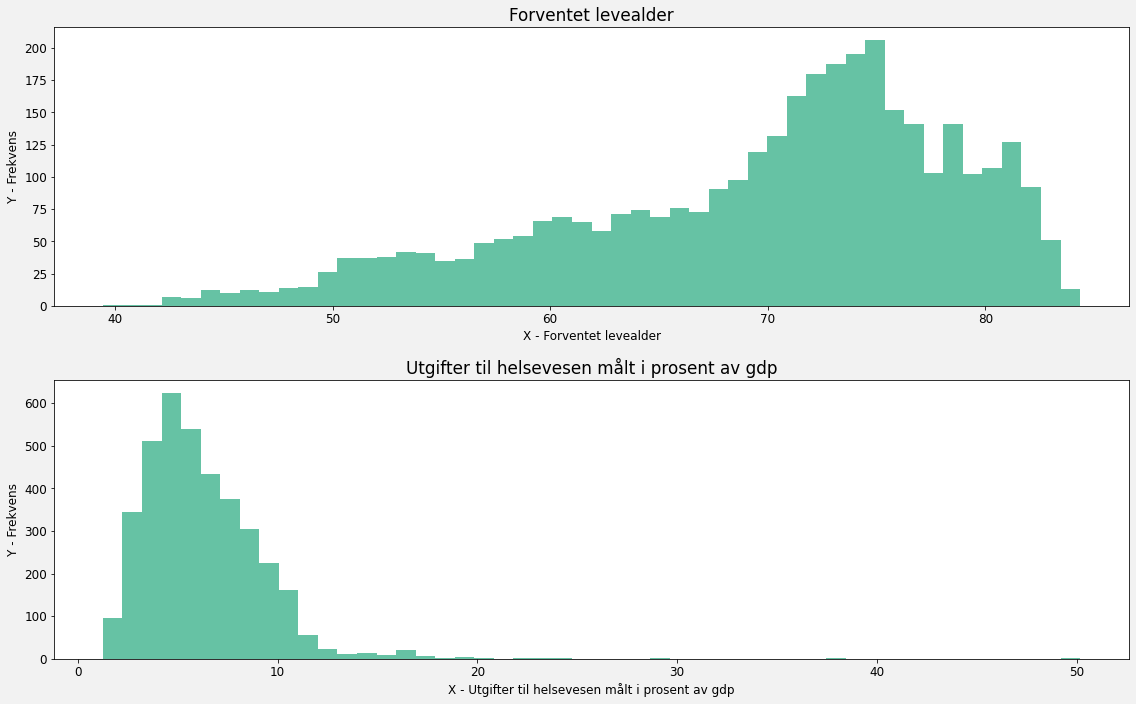

In [6]:
# Plotter noen enkle histogrammer
fig, ax = plt.subplots(2)
ax[0].hist(df["Life_expectancy"], bins=50)
ax[0].set_title("Forventet levealder")
ax[0].set_xlabel("X - Forventet levealder", y=0)
ax[0].set_ylabel("Y - Frekvens")

ax[1].hist(df["hc_expenditure_%_of_GDP"], bins=50)
ax[1].set_title("Utgifter til helsevesen målt i prosent av gdp")
ax[1].set_xlabel("X - Utgifter til helsevesen målt i prosent av gdp", y=0)
ax[1].set_ylabel("Y - Frekvens")
plt.tight_layout()
plt.show()

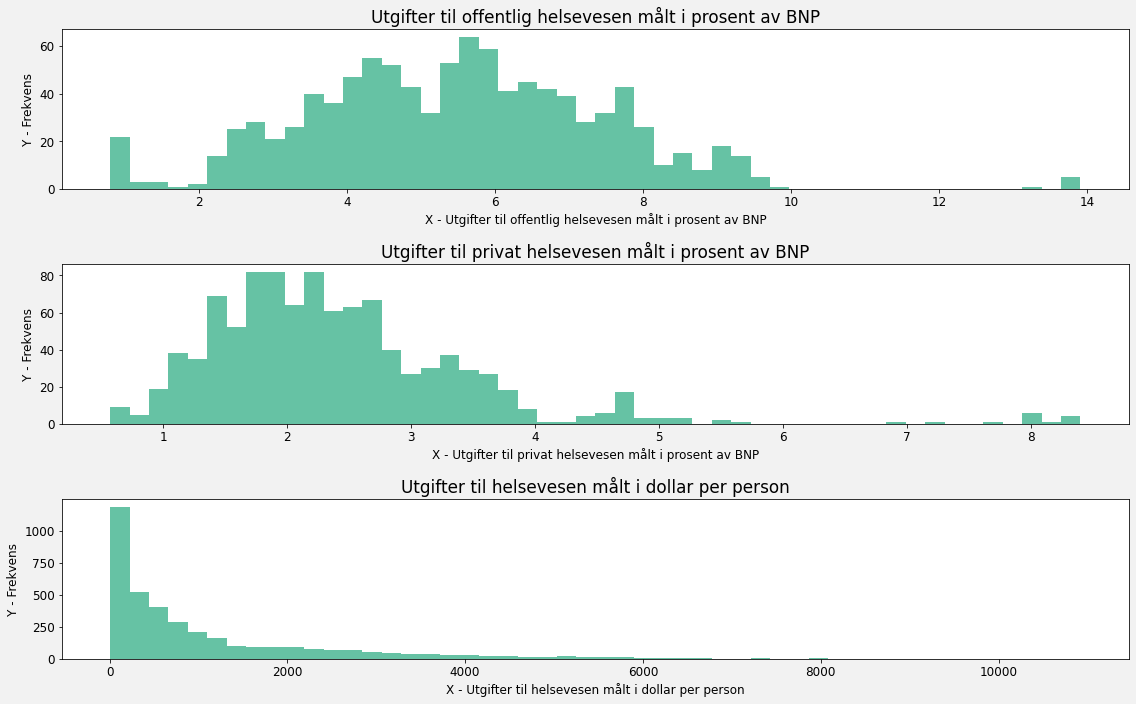

In [7]:
# Lager variabelen for utgifter til privat helsevesen målt i prosent av gdp
df["Private_hc_expenditure_%_of_GDP"] = df["hc_expenditure_%_of_GDP"] - df["Public_hc_expenditure_%_of_GDP"]

# Plotter flere histogrammer
fig, ax = plt.subplots(3)
ax[0].hist(df["Public_hc_expenditure_%_of_GDP"], bins=50)
ax[0].set_title("Utgifter til offentlig helsevesen målt i prosent av BNP")
ax[0].set_xlabel("X - Utgifter til offentlig helsevesen målt i prosent av BNP", y=0)
ax[0].set_ylabel("Y - Frekvens")
ax[1].hist(df["Private_hc_expenditure_%_of_GDP"], bins=50)
ax[1].set_title("Utgifter til privat helsevesen målt i prosent av BNP")
ax[1].set_xlabel("X - Utgifter til privat helsevesen målt i prosent av BNP", y=0)
ax[1].set_ylabel("Y - Frekvens")
ax[2].hist(df["hc_expenditure_PC_in_$"], bins=50)
ax[2].set_title("Utgifter til helsevesen målt i dollar per person")
ax[2].set_xlabel("X - Utgifter til helsevesen målt i dollar per person", y=0)
ax[2].set_ylabel("Y - Frekvens")
plt.tight_layout()
plt.show()

Vi ser på variablenes histogrammer at det ikke er noen tydelige normalfordelte variabler. Særlig interessant er vår avhengige variabel som har en relativt stor spredning på sine verdier. Et relevant poeng for alle histogrammene som er fremstilt er at samlingen av verdier på tvers av land og årstall gjør at fremstillingen drar hele perioden under en kam. 

#### Deskriptiv analyse og sammenhenger


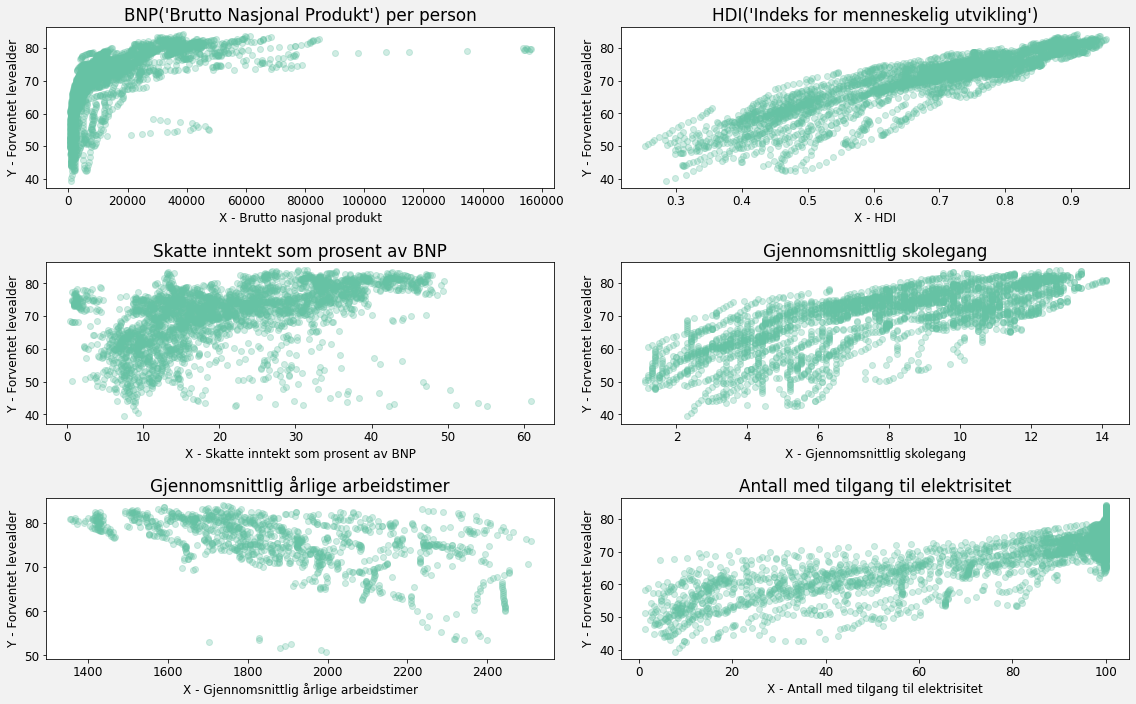

In [8]:
# Lager en rekke spredningsplott som visualiserer ulike variabler sammenlignet med forventet levealder.
fig, ax = plt.subplots(3,2)
ax[0,0].scatter(df["gdp_PC"], df["Life_expectancy"], alpha=0.3)
ax[0,0].set_title("BNP('Brutto Nasjonal Produkt') per person")
ax[0,0].set_xlabel("X - Brutto nasjonal produkt", y=0)
ax[0,0].set_ylabel("Y - Forventet levealder")

ax[0,1].scatter(df["HDI"], df["Life_expectancy"], alpha=0.3)
ax[0,1].set_title("HDI('Indeks for menneskelig utvikling')")
ax[0,1].set_xlabel("X - HDI", y=0)
ax[0,1].set_ylabel("Y - Forventet levealder")

ax[1,0].scatter(df["Tax_reveue_%_of_gdp"], df["Life_expectancy"], alpha=0.3)
ax[1,0].set_title("Skatte inntekt som prosent av BNP")
ax[1,0].set_xlabel("X - Skatte inntekt som prosent av BNP", y=0)
ax[1,0].set_ylabel("Y - Forventet levealder")

ax[1,1].scatter(df["Schooling_avg"], df["Life_expectancy"], alpha=0.3)
ax[1,1].set_title("Gjennomsnittlig skolegang")
ax[1,1].set_xlabel("X - Gjennomsnittlig skolegang", y=0)
ax[1,1].set_ylabel("Y - Forventet levealder")

ax[2,0].scatter(df["Avg_yearly_work_hours"], df["Life_expectancy"], alpha=0.3)
ax[2,0].set_title("Gjennomsnittlig årlige arbeidstimer")
ax[2,0].set_xlabel("X - Gjennomsnittlig årlige arbeidstimer", y=0)
ax[2,0].set_ylabel("Y - Forventet levealder")

ax[2,1].scatter(df["Electricity_access"], df["Life_expectancy"], alpha=0.3)
ax[2,1].set_title("Antall med tilgang til elektrisitet")
ax[2,1].set_xlabel("X - Antall med tilgang til elektrisitet", y=0)
ax[2,1].set_ylabel("Y - Forventet levealder")
plt.tight_layout()
plt.show()

Disse plottene viser sammenhenger mellom forventet levealder og en gitt x variabel. Den mest tydelige korrelasjonen har variabelen HDI som måler hvor utviklet et samfunn er. Derfor er det veldig logisk at disse variablene har en høy positiv sammenheng. Det ikke usansynlig at forventet levealder er et av målene brukt for å utarbeide HDI verdien. Brutto nasjonalprodukt har en positiv korrelasjon men samlingen av observasjonene er veldig ulik det jeg ville antatt. Denne målingen likner formen på histogrammet til  `hc_expenditure_PC_in_$`. Spredningen på skatteinntekt som prosent av BNP er også overaskende, jeg antok at høyere skatt har en sammenheng med velutviklede land og dermed en høyere forventet levealder. Selv om hypotesen blir bekreftet av figuren fremstår effekten mindre enn antatt. Gjennomsnittlig årlige arbeidstimer har en ulik sammenheng enn de andre variablene, her er det en negativ trend. Dette kan ha et par ulike grunner, ofte har velutviklede land høy forventet levealder, men de har også godt utviklede arbeidsvilkår som bidrar til anstendige forhold og timer på jobb. Dette er en indirekte forklaring på forholdet, mer direkte kan vi tenke oss at generelt så vil flere timer i arbeid utgjøre en større helserisiko for arbeideren. Dette gjelder ikke bare høyt utsatte yrker som innebærer fysisk aktivitet og utsatte forhold, men også kontorarbeid og kognitivt krevende arbeid kan være helseskadelig i store mengder.

#### Visualisering av forventet levealder


In [9]:
# Fjerner na variabler.
df_noNa =  df.loc[df["Life_expectancy"].notna(),:]

# Lager en gruppe med de relevante variablene.
group = df_noNa.loc[:, ["Country", "Year", "Life_expectancy"]]
group = group.reset_index()

In [10]:
# Denne cellen lager en rekke ulike verdier som brukes i plottet senere.

LF_scaled = []
growth = []
countries = group["Country"].unique()

for country in countries:
    var = group.loc[group["Country"] == country, "Life_expectancy"]
    y = var.iloc[0]
    growth.append(var.iloc[-1] +1 - y)
    for num in var:
        x = num-y + 1
        LF_scaled.append(x)
        
# "LF_scaled" er variabelen "Life_expectancy" som er skalert ned til startverdi 
# 1 og viser bevegelsen de neste 20 årene trukket fra original-verdien.

# growth er en liste som mottar et lands ekstrem verdi 
# eller den totale endringen fra 2000-2019.

In [11]:
# Listen LF_scaled gjøres om til variabel og en liste av land opprettes
group["LF_scaled"] = LF_scaled

# Jeg lager to ulike datarammer som har de samme parameterne men ulikt innhold for bruk i plotting
pivot_le = group.pivot(index="Year", columns="Country", values="LF_scaled")
pivot_hep = df.pivot(index="Year", columns="Country", values="hc_expenditure_%_of_GDP")

In [12]:
# Jeg oppretter datarammen change inneholder variablne country og growth 
change = pd.DataFrame()
change["Country"] = group["Country"].unique()
change["Relative_change"] = growth

In [13]:
# Her lager jeg en ny dataramme som jeg kaller for outliers,
# som trekker ut de mest ekstreme landene basert på et parameter

entries = [["Country", "Relative_change"]]

for i in change.index:
    if change.iloc[i, 1] > 17 or change.iloc[i, 1] < 1:
        entry = change.iloc[i,:]
        entry = entry.tolist()
        entries.append(entry)
        
outliers = pd.DataFrame(entries[1:],columns=entries[0])
out_names = list(outliers["Country"])

In [14]:
# Legger til land som gir et bedre perspektiv på endringene.
out_names.append("United States")
out_names.append("China")
out_names.append("Norway")

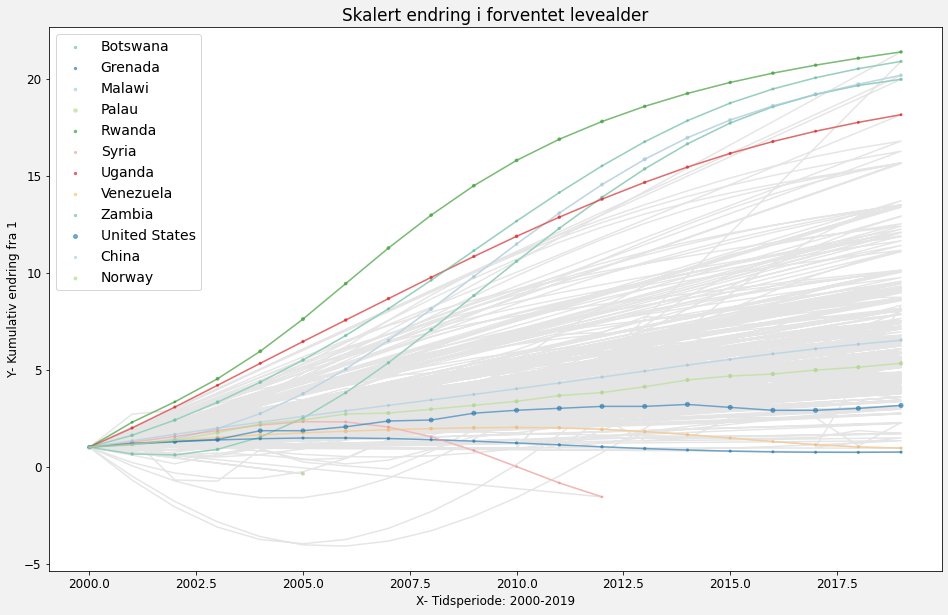

In [15]:
# Her plottes selve figuren med all samlet data.
fig, ax = plt.subplots()
ax.plot(group["Year"], group["LF_scaled"], color="grey", alpha=.2)
ax.set_title("Skalert endring i forventet levealder")
ax.set_ylabel("Y- Kumulativ endring fra 1")
ax.set_xlabel("X- Tidsperiode: 2000-2019") 
        
for land in out_names:
    if land in group["Country"].unique():
        ax.scatter(pivot_le.index, pivot_le[land], label=land, alpha=.6, s=pivot_hep[land])
        ax.plot(pivot_le.index, pivot_le[land], alpha=.6 )
        ax.legend() 

Denne grafen visualiserer endringen i forventet levealder landene har hatt de siste 20 årene. De fargede landene har hatt enten en høy positiv utvikling, eller en negativ utvikling i forventet levealder. Jeg plukket de ut som statistiske uteliggere basert på betingelsen om at deres aggregerte verdi må være større enn 17 eller lavere enn 1. Dette gjør at vi uthever de landene med størst vekst og de med tilbakegang i forventet levealder. Jeg inkluderte også Norge, USA og Kina for å gi et perspektiv som bidrar til å kunne tolke trendene.  

Videre takler oppgaven hvordan de ulike uavhengige variablene påvirker forventet levealder.
<br>
<br>
<br>
<br>
<br>

## Enkel regresjon 


#### Enkele regresjoner

In [16]:
# Lager variabelen som viser andelen utgifter til privat helsevesen målt i prosent av gdp.
df["Private_hc_expenditure_%_of_GDP"] = df["hc_expenditure_%_of_GDP"] - df["Public_hc_expenditure_%_of_GDP"]


LE_mod1 = smf.ols("Life_expectancy~Q('hc_expenditure_%_of_GDP')", data=df).fit()
LE_mod2 = smf.ols("Life_expectancy~Q('Public_hc_expenditure_%_of_GDP')", data=df).fit()
LE_mod3 = smf.ols("Life_expectancy~Q('Private_hc_expenditure_%_of_GDP')", data=df).fit()

# Jeg skalerer variabelen slik at 1 enhet økning i den uavhengig variabelen tilsvarer 1000 dollar per person, 
# som burde gi et betydelig utslag sammenlignet med 1 dollar.
df["hc_expenditure_PC_in_100$"] = df["hc_expenditure_PC_in_$"]/100
LE_mod4 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$')", data=df).fit()

# Printer ut parameter verdiene
print("Forventet levealder model 1:")
print(LE_mod1.params)
print("\n")
print("Forventet levealder model 2:")
print(LE_mod2.params)
print("\n")
print("Forventet levealder model 3:")
print(LE_mod3.params)
print("\n")
print("Forventet levealder model 4:")
print(LE_mod4.params)

Forventet levealder model 1:
Intercept                       62.830798
Q('hc_expenditure_%_of_GDP')     1.125998
dtype: float64


Forventet levealder model 2:
Intercept                              69.895106
Q('Public_hc_expenditure_%_of_GDP')     1.410297
dtype: float64


Forventet levealder model 3:
Intercept                               79.771768
Q('Private_hc_expenditure_%_of_GDP')    -0.896216
dtype: float64


Forventet levealder model 4:
Intercept                         65.299346
Q('hc_expenditure_PC_in_100$')     0.406715
dtype: float64


De fire ulike regresjonsmodellene gir fire ulike skjæringspunkter eller `intercept` verdi for deres gitte graf. Det vil si at uten påvirkning fra vår uavhengige variabel ville forventet levealder være verdien til `intercept`. Det er høy sannsynlighet for at disse tallene ikke er helt presise. Et eksempel på dette er variabelen som ser på effekten av økte utgifter til privat helsevesen målt i prosent av BNP. Her settes `intercept` verdien til veldig høye 79.77, dette er antageligvis fordi regresjonsmodellen tolker variablenes effekt som negativ for forventet levealder, i realiteten virker dette høyst usannsynlig.  <br>
Det burde også stilles spørsmål til utregningen av variabelen, jeg har selv konstruert denne variabelen basert på mine antagelser om hvordan `Public_hc_expenditure_%_of_GDP` og `hc_expenditure_%_of_GDP` ble samlet inn. Det er ikke usannsynlig at differansen mellom disse to ikke utgjør utgifter til privat helsevesen på den måten jeg tror. Av den grunn er det også usannsynlig at denne variabelen blir benyttet videre i oppgaven, men det kunne vært en interessant vinkling. 

Av de resterende modellene ser det ut til at `hc_expenditure_PC_in_100$` ikke har på langt nær så stor effekt som de andre variablene. Forklaringen på dette kan ligge i variablenes måleenheter. `hc_expenditure_%_of_GDP` og `Public_hc_expenditure_%_of_GDP` ser på en endring i et helt prosentpoeng av BNP som utgjør ekstreme mengder ressurser. Med dette perspektivet er det naturlig at utslaget på forventet levealder er større. Det burde da også poengteres at `Intercept` verdien til forventet levealder i utgangspunktet allerede er ganske høy uten effekten av utgifter til helsevesen. Dette kan forklare hvorfor effekten ikke virker så stor, men det kan også være et tegn på at det finnes underliggende variabler som skaper støy for de verdiene vi får ut av modellen. Fremover vil jeg i større analyser hovedsakelig benytte `hc_expenditure_PC_in_100$`, fordi det er lettere å forstå og da tolke påvirkningen av en dollar enn et prosentpoeng i BNP. Det standardiserer også målingene på tvers av land, ettersom BNP kan variere stort.

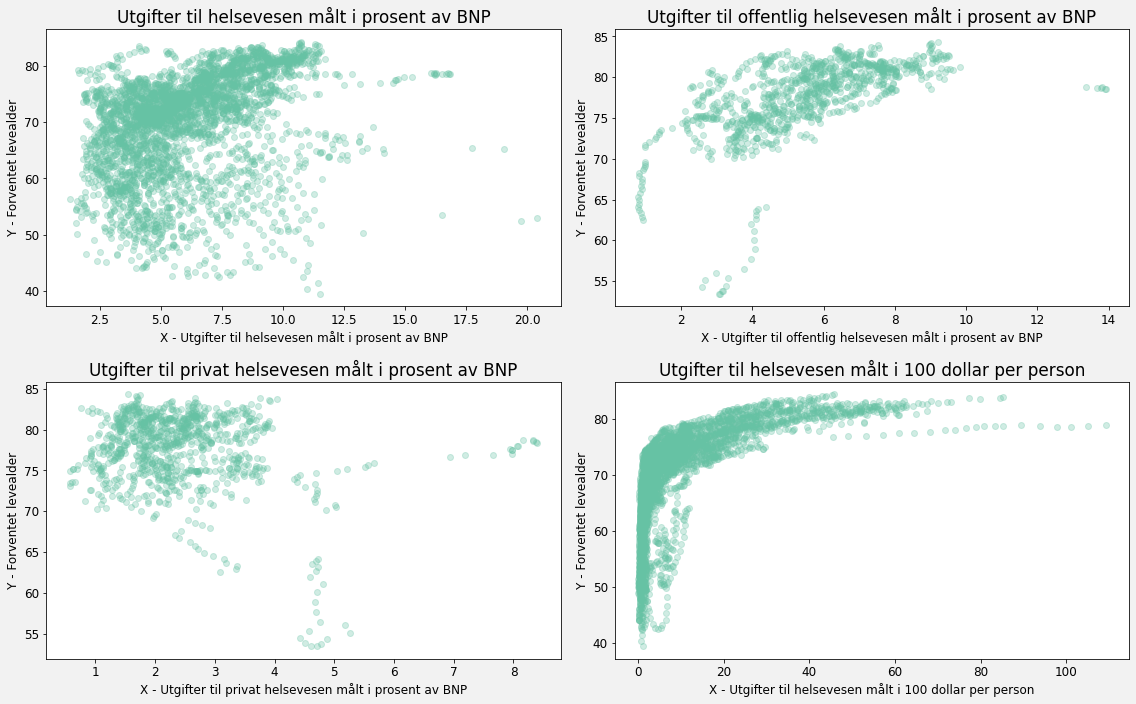

In [17]:
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(df["hc_expenditure_%_of_GDP"], df["Life_expectancy"], alpha=0.3)
ax[0,0].set_title("Utgifter til helsevesen målt i prosent av BNP")
ax[0,0].set_xlabel("X - Utgifter til helsevesen målt i prosent av BNP")
ax[0,0].set_ylabel("Y - Forventet levealder")

ax[0,1].scatter(df["Public_hc_expenditure_%_of_GDP"], df["Life_expectancy"], alpha=0.3)
ax[0,1].set_title("Utgifter til offentlig helsevesen målt i prosent av BNP")
ax[0,1].set_xlabel("X - Utgifter til offentlig helsevesen målt i prosent av BNP")
ax[0,1].set_ylabel("Y - Forventet levealder")

ax[1,0].scatter(df["Private_hc_expenditure_%_of_GDP"], df["Life_expectancy"], alpha=0.3)
ax[1,0].set_title("Utgifter til privat helsevesen målt i prosent av BNP")
ax[1,0].set_xlabel("X - Utgifter til privat helsevesen målt i prosent av BNP")
ax[1,0].set_ylabel("Y - Forventet levealder")

ax[1,1].scatter(df["hc_expenditure_PC_in_100$"], df["Life_expectancy"], alpha=0.3)
ax[1,1].set_title("Utgifter til helsevesen målt i 100 dollar per person")
ax[1,1].set_xlabel("X - Utgifter til helsevesen målt i 100 dollar per person")
ax[1,1].set_ylabel("Y - Forventet levealder")
plt.tight_layout()
plt.show()

Dette er de samme forholdene visualisert i et sprednings plott. Alle figurene som måler bevegelsen gitt prosentandel i BNP har noen fellestrekk, men generelt ser vi en samling av punkter i øvre venstre hjørnet. Dette betyr at en lavere utgift til helsevesen måler samtidig høy levealder. Det er ingen tydelig trend blant de tre prosent figurene. Den mest tydelige har `Public_hc_expenditure_%_of_GDP` der punktmålingene samler seg i en noe økende lineær trend. Plottet har også noen betydelige statistiske uteliggere, men det er færre og spredningen rundt trenden er også tydelig redusert. Dette kan forklare hvorfor regresjonsmodellen ser på denne variabelen som den sterkeste påvirkeren på bakgrunn av den tydeligere korrelasjonen vi ser i figuren. <br>
Ser vi på `Private_hc_expenditure_%_of_GDP` er det flere uteliggere som har høye mål på prosentandelen private utgifter uten at dette gir noen positive utslag på forventet levealder, dette spiller antakeligvis inn på det negative negative utslaget på regresjonsmodellen. <br>
Vi ser her at en interessant sammenheng finnes hos utgifter målt i dollar. Figuren viser at av de målte punktene, vil forventet levealder gå over 70 år så lenge det brukes 2000 $ per person. I Norge vil dette grovt utgjøre 2000 x 5 000 000 = 10 milliarder dollar. I 2021 var vår BNP målt til 482.4 milliarder dollar som betyr at vi kunne brukt rett over 2 prosent av BNP for å oppnå en forventet levealder på 70 år.

In [18]:
# Trekker ut verdien på utgifter til helsevesen i Norge i 2019
pivot_HC = df.pivot(index="Year", columns="Country", values="hc_expenditure_%_of_GDP")
Norge2019 = pivot_HC.loc[2019, "Norway"]
print("Prosent av BNP som gikk til helsevesen i Norge i 2019: ", Norge2019)

Prosent av BNP som gikk til helsevesen i Norge i 2019:  10.52


Kan vi da konkludere at Norge kan spare 10 talls milliarder dollar hvert år og oppnå samme nesten samme resultat? En slik konklusjon ville vært en ekstrem generalisering, det skal poengteres at Norges forventede levealder ligger i 80 tallene og ikke 70. Det er også mange andre faktorer som ikke presenteres i denne modellen som har stor innvirkning på forventet levealder.

Et interessant moment er hvorfor noen land som investerer mellom 1000 og 2000 dollar per person ikke oppnår like høy forventet levealder og hva som gjør at de som legger ned 6000/8000 dollar har samme eller lavere forventet levealder enn alle de landene som ligger rundt 2000 til 4000. <br>
En umiddelbar hypotese er pengebruken, selv om mye penger blir gitt til helsevesen så betyr ikke det at pengene faktisk går til noe produktivt. En annen faktor er hva pengene brukes til, høyst sannsynlig brukes bare deler av disse summene på noe som direkte påvirker levealderen. Generell helse, fastleger og sykdommer som ikke er livstruende, men krever en hel del ressurser til oppfølging og avvikling. Disse faktorene kan være en sterk bidragsyter til at investeringene ikke gir noen stor effekt. <br>

Et siste poeng, som gjelder alle figurene, er tidsperspektivet. Dette er en modell som trekker inn data fra over 20 år og nesten 200 land. Det finnes høyst sannsynlig flere land under utvikling i denne puljen som kan ha investert høyt i helseveset i en periode uten at dette gir umiddelbare utslag på forventet levealder. Dette kan særlig brukes forklare gruppen som befinner seg mellom 500-1500 dollar og under 65 år forventet levealder på figuren om utgifter målt i dollar.

#### Visualisere forholdet mellom utgifter til helsevesen og forventet levealder

Jeg ønsker å se litt nærmere på effektiviteten av pengebruken, altså hvor my nytte disse summene utgjør, noen eksakt estimat vil jeg trolig ikke kunne konkludere med, men ved å dele `hc_expenditure_PC_in_100$` på `Life_expectancy` så får vi et forholdstall som kan si noe om hvor mye effekt pengene har. Dette er også en interessant prosess å gjøre på offentlige utgifter ettersom det kan si noe om skattepengenes effektivitet til forventet levealder, men jeg velger å avgrense denne oppgaven til et generelt forhold.

In [19]:
# lager variabelen som skal definere forholdet
df["expend_expect_relation"] = df["hc_expenditure_PC_in_100$"]/df["Life_expectancy"] 

Ved en slik transformasjon vil lave tall være gunstig, et lavt tall vil simplifisert kunne ha tre forklaringer;
- Pengebruken er veldig effektiv, det vil si at kronene som settes inn i helsevesenet aktivt løfter forventet levealder.
- Pengebruken har i praksis null effekt, dette vil si at levealderen er veldig høy uten noen særlige innskudd av penger som betyr at det er andre variabler som positivt påvirker forventet levealder.
- Den siste muligheten er en svakhet ved transformasjonen, ved å dele disse to variablene vil land som bruker ekstremt lite på helsevesen generelt virke veldig "effektive". Forholdet 1/40 som i utgangspunktet er en dårlig fordeling med lav forventet levealder, vil ha et bedre forholdstall enn et land med 20/80. Hovedsakelig er det land som har en høyere levealder jeg ønsker å utforske. <br>

I et forsøk på å se effektiviteten av pengebruk og unngå svakheten i størst mulig grad kan vi trekke ut en gruppe basert på kriterier som forsikrer at vi ser på en høy forventet levalder. Jeg velger å trekke ut observasjoner innenfor kriteriene X < 20 og y > 80 som de landene med effektiv pengebruk og kriteriene x > 40 og y < 80 for de landene med ineffektiv pengebruk

In [20]:
# Trekker ut de landene som er relevante gitt kriteriene
exp_df = df.loc[df["hc_expenditure_PC_in_100$"] <= 20]
limit_pos_df = exp_df.loc[df["Life_expectancy"] >= 80]

exp2_df = df.loc[df["hc_expenditure_PC_in_100$"] >= 40]
limit_neg_df = exp2_df.loc[df["Life_expectancy"] <= 80]

limit_neg = limit_neg_df["Country"].unique().tolist()
limit_pos = limit_pos_df["Country"].unique().tolist()
limit_countries = limit_neg + limit_pos

In [21]:
# Legger til Norge og Kina for å skape flere relaterbare sammenligningspunkter.
limit_countries.append("Norway")
limit_countries.append("China")

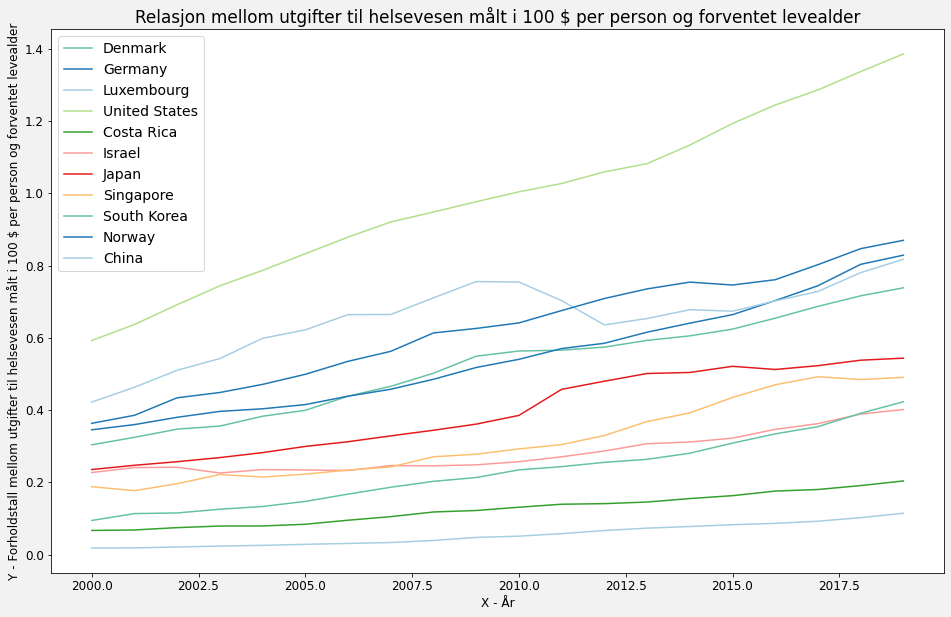

In [22]:
# Benytter en funksjon for å lettere kunne visualisere variabelen
pivot_relation = df.pivot(index="Year", columns="Country", values="expend_expect_relation")

fig, ax = plt.subplots()
plt.plot(pivot_relation.loc[:, limit_countries], label=limit_countries)
plt.title("Relasjon mellom utgifter til helsevesen målt i 100 $ per person og forventet levealder")
plt.ylabel("Y - Forholdstall mellom utgifter til helsevesen målt i 100 $ per person og forventet levealder")
plt.xlabel("X - År")
plt.legend()
plt.show()

Vi ser i denne figuren at USA har et betydelig dårligere forholdstall enn de andre landene, dette stemmer til en viss grad med realiteten, USA har fått stor kritikk fra befolkningen om dårlig helsevesen som gir lite tilbake til befolkningen. Disse landene, med unntak av Norge og Kina, ble trukket frem fordi det i et eller flere år ble observert tall innenfor kriteriene jeg har satt. Den økende trenden som samtlige land her følger kan antageligvis forklares av at utgiftene som går til helsevesen ikke øker i takt med forventet levealder, det betyr ikke nødvendigvis at det ikke er en effekt, men bekrefter allikevel ikke sammenhengen. <br> 
Igjen burde poenget om andre faktorer trekkes frem, denne figuren er veldig simplifisert, som gjør den lite presis. Min valgte retning med denne oppgaven gjør det vanskelig å utforske dette momentet noe dypere. Allikevel er det et interessant moment og jeg inkludere derfor denne analysen også.

Jeg påpeke enda en svakhet ved figuren, og hvordan jeg fremstiller svarene. Jeg valgte å gjøre denne analysen med et selektivt utvalg av land. En av grunnene til dette er at det bidrar til å lettere kunne visualisere og tolke resultatene, den andre grunnen er som nevnt over at formateringen av disse variablene skaper noe feil-resultater som ikke representerer det vi ønsker og teste. Svakheten med å trekke ut en liten gruppe land er vanskeligheten i å se større sammenhenger og at man muligens generaliserer resultatene til et bredere spekter av observasjoner. <br>
Et siste moment ved disse visualiseringene er at når forholdet mellom forventet levealder og utgifter til helsevesen forblir uendret blir landene representert som stabile linjer uten store endringer, til tross for at verdiene kan endres betydelig. 

#### Visualisering av hvordan endringer i utgifter til helsevesen påvirker forventet levealder over tid.


In [23]:
# Resirkulerer mye av koden brukt for å lage den lignende visualiseringen til forventet levealder.
df_noNa =  df.loc[df["hc_expenditure_PC_in_100$"].notna(),:]
group2 = df_noNa.loc[:, ["Country", "Year", "hc_expenditure_PC_in_100$"]]
group2 = group2.reset_index()

LF_scaled2 = []
growth2 = []
countries2 = group2["Country"].unique()


for country in countries2:
    var = group2.loc[group2["Country"] == country, "hc_expenditure_PC_in_100$"]
    y = var.iloc[0]
    growth2.append(var.iloc[-1] - y)
    for num in var:
        x = num-y
        LF_scaled2.append(x)
        
group2["HCED_scaled"] = LF_scaled2

pivot_hced = group2.pivot(index="Year", columns="Country", values="HCED_scaled")


change2 = pd.DataFrame()
change2["Country"] = group2["Country"].unique()
change2["Relative_change"] = growth2

entries2 = [["Country", "Relative_change"]]

for i in change2.index:
    if change2.iloc[i, 1] > 40 or change2.iloc[i, 1] < -1:
        entry = change2.iloc[i,:]
        entry = entry.tolist()
        entries2.append(entry)
        
outliers2 = pd.DataFrame(entries2[1:],columns=entries2[0])
out_names2 = list(outliers2["Country"])
out_names2.append("China")

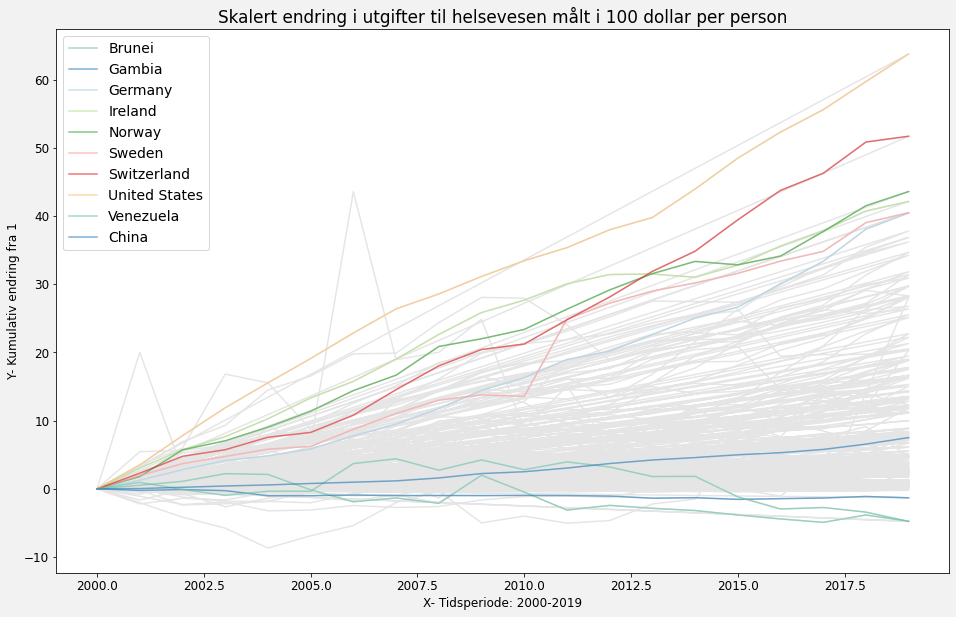

In [24]:
fig, ax = plt.subplots()
ax.plot(group2["Year"], group2["HCED_scaled"], color="grey", alpha=.2)
ax.set_title("Skalert endring i utgifter til helsevesen målt i 100 dollar per person")
ax.set_ylabel("Y- Kumulativ endring fra 1")
ax.set_xlabel("X- Tidsperiode: 2000-2019") 
        
for land in out_names2:
    if land in group2["Country"].unique():
        ax.plot(pivot_hced.index, pivot_hced[land], alpha=.6, label=land )
        ax.legend() 

Formålet med denne visualiseringen er å kunne fremheve noen land som viser unike trender i utgifter til helsevesen og se nærmere på deres utvikling i forventet levealder over samme periode.

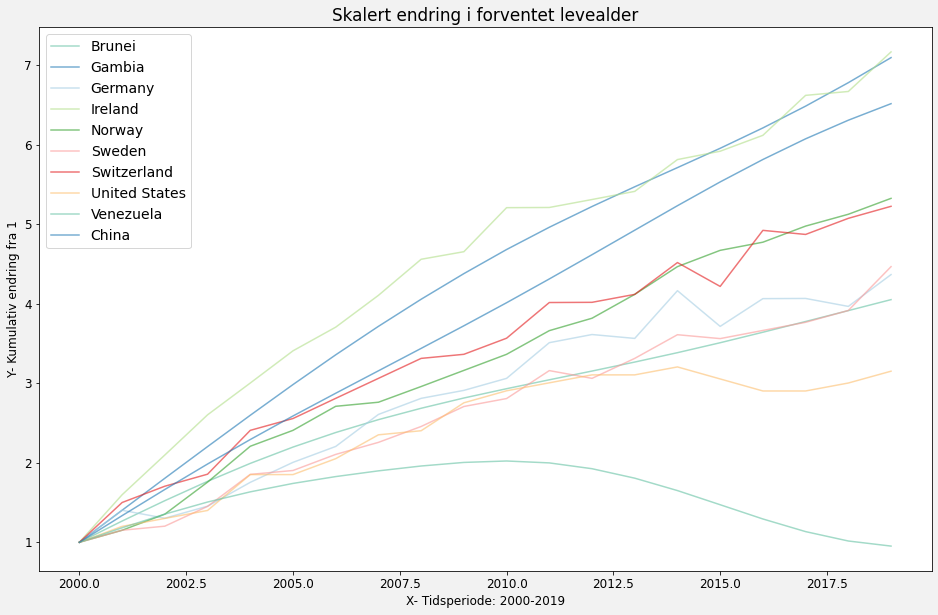

In [25]:
pivot_LE = df.pivot(index="Year", columns="Country", values="Life_expectancy")

fig, ax = plt.subplots()
ax.set_title("Skalert endring i forventet levealder")
ax.set_ylabel("Y- Kumulativ endring fra 1")
ax.set_xlabel("X- Tidsperiode: 2000-2019") 

for land in out_names2:
        if land in group["Country"].unique():
            ax.plot(pivot_le.index, pivot_le[land], alpha=.6, label=land )
            ax.legend() 

Alene er det vanskelig å trekke særlige vurderinger fra denne figuren, men hvis vi ser den i sammenheng med kunnskapen vi har om økningen i utgifter til helsevesen kan vi begynne å danne oss et bilde av hvordan denne økningen eller reduksjonen har påvirket disse spesifikke landene. Av de fire landene som viste liten eller negativ økning i utgifter ser vi at kun Venezuela har en negativ kurve i utviklingen av forventet levealder. <br>
Det er derfor interessant å se at økningen i forventet levealder i Brunei, Gambia og Kina kan skyldes andre årsaker enn en økning av utgifter til helsevesen. Ser vi bort ifra Irlands imponerende økning ligger de fleste landene som over tid har økt utgiftene til helsevesen med over 4000 dollar fra deres utgangspunkt med kun en økning på 2-4 år i forventet levealder. <br> 

Med et slikt resultat kan virkningen av å investere i helsevesen virkelig settes på prøve. Land som tilsynelatende legger lite penger til feltet har drastisk stor vekst i deres forventede levealder og de som bruker flere tusenvis av dollar får svært liten avkastning. Mitt mest ekstreme eksempel er USA som på 20 år har økt utgiftene med 6000 dollar per person og har fått en avkastning på denne investeringen med 2 år. <br>

Et siste poeng jeg vil trekke ut fra denne analysen er formål, som på mange måter har noen felles trekk til effektiviteten av pengebruk som er drøftet over. Med formål sikter jeg til hva disse landene ønsker å oppnå ved å bruke flere tusen dollar på alle menneskene som bor i landet, muligens er et par år på denne skalaen verdt investeringen. Det er også mulig at disse pengene har som formål ikke nødvendigvis å hindre død, men lindre smerte under livet, i form av omsorg, støtte og oppfølging av de som trenger det slik at de kan leve et normalt sunt liv som alle andre rundt seg.

#### Regresjonslinjer og log transformering

Modell parametere:
Intercept                         65.299346
Q('hc_expenditure_PC_in_100$')     0.406715
dtype: float64


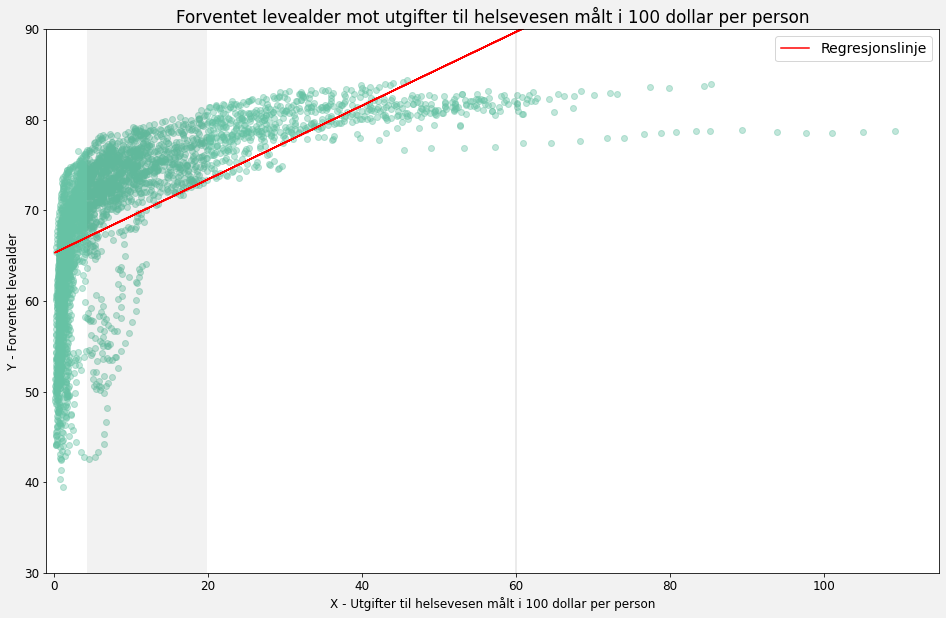

In [26]:
# Lager variabler for å tegne en relasjonslinje
a_hat = LE_mod4.params[0]
b_hat = LE_mod4.params[1]
print("Modell parametere:")
print(LE_mod4.params)

# Plotter figuren
fig, ax = plt.subplots()
plt.axvline(12, color="black", alpha=.05, lw=120)
plt.axvline(60, color="black", alpha=.1)
plt.scatter(df["hc_expenditure_PC_in_100$"], df["Life_expectancy"], alpha=.4)
plt.plot(df["hc_expenditure_PC_in_100$"], a_hat + b_hat*df["hc_expenditure_PC_in_100$"], color="red", 
         label="Regresjonslinje")


plt.xlim(-1,115)
plt.ylim(30,90)
plt.legend()
plt.title("Forventet levealder mot utgifter til helsevesen målt i 100 dollar per person")
plt.ylabel("Y - Forventet levealder")
plt.xlabel("X - Utgifter til helsevesen målt i 100 dollar per person")
plt.show()

Jeg benytter her variabelen som måler utgifter i 100 dollar, her har jeg laget en regresjonslinje på spredningsplottet basert på regresjonsmodellen fra tidligere. Generelt i modellen er det tydelig at utgiftene i området rundt 1000 til 2000 dollar har en betydelig synligere effekt på forventet levealder enn dollarene brukt etter eller før dette punktet. Allikevel følger de fleste punktestimatene er positiv trend særlig etter dette punktet. Med unntak av de mest ekstreme verdiene fra 6000 dollar og over som stagnerer.

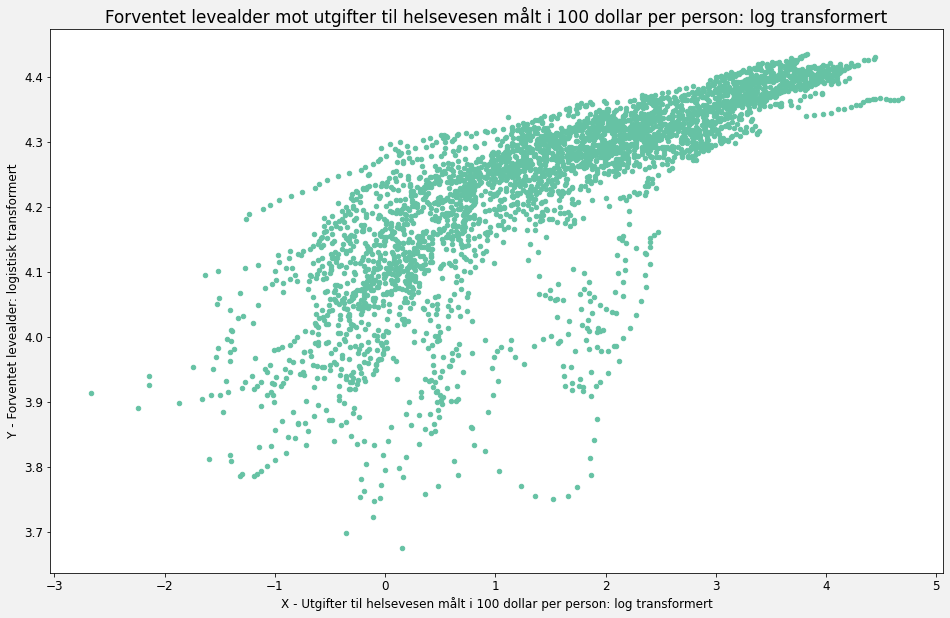

In [27]:
# Jeg lager nye variabler som er logaritmen av forventet levealder og utgifter til helsevesen målt i dollar
# Jeg forkorter også navnene betydelig.
df["log_LE"] = np.log(df["Life_expectancy"]) 
df["log_HC$"] = np.log(df["hc_expenditure_PC_in_100$"])

df.plot.scatter("log_HC$", "log_LE")
plt.xlabel("X - Utgifter til helsevesen målt i 100 dollar per person: log transformert")
plt.ylabel("Y - Forventet levealder: logistisk transformert")
plt.title("Forventet levealder mot utgifter til helsevesen målt i 100 dollar per person: log transformert")
plt.show()

Denne figuren viser en veldig ulik fordeling fra de vi tidligere har sett, for oppgavens del er det viktigste at den positive trenden fremstår jevnere i denne figuren. <br>
Formålet med å gjennomføre denne log transformasjonen er å gjøre dataen mer normalfordelt slik at det er lettere å tolke verdier som gjennomsnitt, standardavvik og varians.

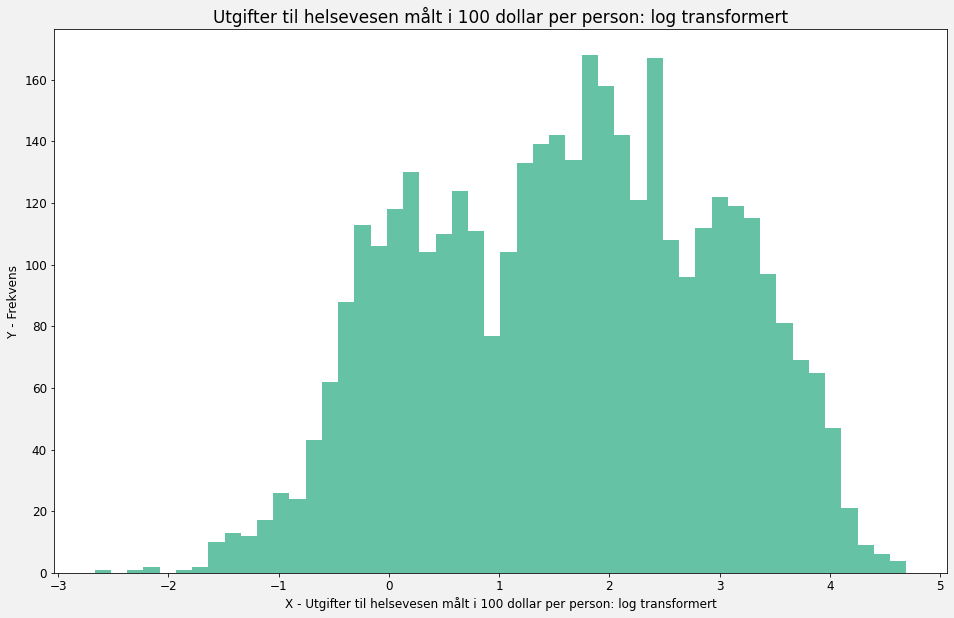

In [28]:
fig, ax = plt.subplots()
ax.hist(df["log_HC$"], bins=50)
ax.set_title("Utgifter til helsevesen målt i 100 dollar per person: log transformert")
plt.ylabel("Y - Frekvens")
plt.xlabel("X - Utgifter til helsevesen målt i 100 dollar per person: log transformert")
plt.show()

Som vi ser på figuren er ikke verdiene helt normalfordelt, det er betydelig bedre enn det det var før transformasjonen. Denne figuren har tilsynelatende tre topper, dette er et tegn på at det er tre grupperinger av observasjoner som forekommer oftere enn andre. 

In [29]:
# Lager en ny regresjonsmodell med logaritme variablene
log_LE_mod4 = smf.ols("log_LE~Q('log_HC$')", data=df).fit()

print(log_LE_mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_LE   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     5840.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:47:51   Log-Likelihood:                 3686.5
No. Observations:                3559   AIC:                            -7369.
Df Residuals:                    3557   BIC:                            -7357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.1078      0.002   1870.740   

I motsetning til den vanlige tolkningen av koeffisient verdien, vil denne log mot log modellen tolkes noe annerledes. Ved en fastsatt prosent ending i `log_HC$` vil vår avhengige variabel endres med prosentendringen opphøyd i 8.1% prosent. Normalt ville `intercept` verdien endres med koeffisient verdien gitt en endring av 1 enhet i vår uavhengige variabel. En endring på 10% i `log_HC$` vil endre forventet levealder med 1.1^0.081= 0.77%, som ikke er en spesielt stor endring, men siden log-verdiene i utgangspunktet er mindre kan selv en lav prosentvis endring gi utslag på den normale verdien.

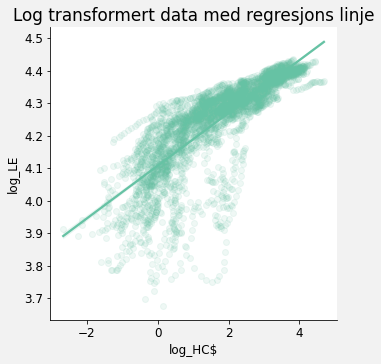

In [30]:
# En figur som automatisk tegner opp en regresjonslinje 
sns.lmplot(x="log_HC$", y="log_LE", data=df, scatter_kws={'alpha':0.1})
plt.title("Log transformert data med regresjons linje")
plt.show()

#### Kausalitet og usikkerhet: Enkel regresjon

Det er mye som kan diskuteres og trekkes frem som svakheter i en enkel regresjon. En åpenbar mangel ligger i mengden variabler. Særlig ved en undersøkelse av denne størrelsen skal det godt gjøres å finne en enkelt variabel som kan forklare og dekke hele endringen til vår avhengige variabel. Derfor kan vi konkludere den enkle regresjonen med følgende vurderinger, penger brukt per person på helsetjenester har en effekt, ikke like direkte som man nødvendigvis ville tenkt, men den virker å ha en ganske substansiell effekt i de lavere eller midtre verdiene, som tilsvarer 1000 til 2000 dollar. Det er også sannsynlig å konkludere at det finnes en rekke andre variabler som spiller inn på denne vurderingen. Det vil trolig være en rekke variabler som påvirker den effekten den enkle regresjonen fremhever, og inkludering av flere variabler og andre analyser vil bedre belyse den faktiske effekten.

Et punkt som burde trekkes frem etter en gjennomgang av denne enkle regresjonen er igjen variabelens effekt. Gjennom oppgaven har jeg og vil jeg ta utgangspunkt i å lete etter effekten utgifter til helsevesen har på forventet levealder, men en interessant problemstilling som jeg ønsker og bruke litt tid på er hypotesen om forventet levealder påvirker utgifter til helsevesen. Det å vri på mine forutsetninger på denne måten er ikke bare et interessant moment, men vil også bidra til å bedre belyse forholdet mellom disse to variablene.

<br>

#### Forventet levealders effekt på utgifter til helsevesen.

Det dette forholdet i praksis vil innebære er ganske logisk, hvis vi ser bort i fra muligheten om at investering i helsevesen gir en effekt på forventet levealder, vil man begynne å vurdere hypotesen om denne økningen av levealder bidrar til å drive helsekostnadene oppover. Etter hvert som mennesker opparbeider seg en bedre levestandard har man tendenser til å koste mer, dette gjelder også helsesektoren. Dyrere behandlingsformer, andre prioriteringer som støtte og omsorg, flere dødelige sykdommer er ikke like fremtredende, dette bidrar til at det brukes mer penger for å holde folkehelsen oppe. Det at folk lever lenger driver også opp den individuelles kostnad, eldre personer krever betydelige mer midler for at de skal kunne leve normalt. Denne faktoren kan ha langt større påvirkning på utgiftene enn den har på faktisk forventet levealder, mengden penger veier potensielt ikke opp for de to eller tre ekstra årene eldre kan leve. En av godene i et velferdssamfunn er at alle blir ivaretatt. Dette er en dyr prioritering, som fungerer som en motsetning til det forholdet oppgaven ønsker å avklare.

In [31]:
#regresjonsmodel som setter utgifter til helsevesen som avhengig variabel
rev_LE_mod4 = smf.ols("Q('hc_expenditure_PC_in_100$')~Life_expectancy", data=df).fit()
rev_LE_mod4.params

Intercept         -58.075452
Life_expectancy     0.987762
dtype: float64

I utgangspunktet gir ikke verdien av negative utgifter på 5800 dollar mye mening. Det vi kan trekke fra tallet er derimot at hvis forventet levealder skulle tilsvart null ville det ikke vært kostnader eller utgifter knyttet til helsevesenet, men inntekter. Dette er selvfølgelig helt urealistisk og vil ikke kunne benyttes i stor grad, derimot er koeffisienten til forventet levealder svært interessant. Når forventet levealder øker med et år vil utgiftene per person gå opp med nesten akkurat 100 dollar, som de enkle regresjonene er det veldig mange momenter som gjør det vanskelig og trekke noe spesifikt ut fra modellen. Til gjengjeld er det en tydelig effekt som er klart større enn utgiftene har på forventet levealder, og vi kan konkludere i at hypotesen bærer frukt som et reelt argument som motbeviser den direkte effekten oppgaven ønsker å avklare.

En hypotese modellen også presenterer er om et menneske vil leve til omtrent 58 år uten utgifter til helsevesen, men at man etter denne alderen i snitt koster 100 dollar mer for hvert år. Oppgaven vil ikke utforske dette i større grad, men fra denne drøftingen er det en reell muligheten for at forholdet jeg utforsker har motsatt årsakssammenheng.
<br>
<br>

## Multippelregresjon

I denne delen av oppgaven skal vi se på regresjonsmodeller med flere uavhengige variabler, dette er for å undersøke ulike andre variabler sin effekt på vår avhengige variabel, forventet levealder. Og for å se om disse variablene kan bidra til å bedre forklare effekten av å investere i helsevesen. <br>
Som i den enkle regresjonen benytter jeg "OLS" modellen også for de mulitple regresjonene. "OLS" står for Ordinary Least Squares og er en modell som plasserer den lineære regresjonslinjen basert på den laveste summen av kvadratroten til observasjonenes samlede avstand. Denne modellen er vanlig også i muliple regresjoner og er antageligvis ikke den beste regresjonsmodellen for oppgaven, men et godt utgangspunkt for tolkning og forbedring, som ved bruk av diagnostikk som skal gjennomføres senere i oppgaven.

Når jeg skulle plukke ut variabler til disse modellene tok jeg utgangspunkt i de variablene jeg antok hadde en effekt på forventet levealder. Jeg inkluderte også variabler som jeg trodde kunne være underliggende, det vil si at de både er korrelert med x og y variabelen. Denne typen variabler antar jeg det er mange av i disse regresjonsmodellene, noen kandidater til dette er `HDI`, `gdp_pc`eller `democracy_rating`. Når en underliggende variabler ikke inkluderes ser man ofte resultater som ikke representerer den faktiske sammenhengen mellom de inkluderte variablene. En stor usikkerhet med underliggende variabler er at man ofte ikke er klar over deres tilstedeværelse. Variablene og datasettene jeg har samlet inkluderer en rekke variabler som kan være underliggende, det vil derfor være viktig å være klar over deres tilstedeværelse og deres potensielle påvirkningskraft.

In [32]:
# For å skille de enkle regresjonene fra multipple regresjonen bruker jeg m_ for multippel.
# Jeg tar med LE_mod4 for å kunne sammenligne de ulike endringene fra den enkele regresjonen.
LE_mod4 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$')", data=df).fit()
m_mod1 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$') + Democracy_rating + Q('Tax_reveue_%_of_gdp') + Schooling_avg + Electricity_access", data=df).fit()
m_mod2 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$') + Avg_yearly_work_hours + Terrorism_deaths + gdp_PC + Homicides_deaths + Schooling_avg + Electricity_access + Q('Tax_reveue_%_of_gdp')",data=df).fit()
m_mod3 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$') + Population + Avg_yearly_work_hours + Child_mortality_per100 + Democracy_rating + Terrorism_deaths + gdp_PC + Homicides_deaths+HDI + Schooling_avg + Electricity_access + Q('Tax_reveue_%_of_gdp')", data=df).fit()

In [33]:
print("LE_mod4:")
print(LE_mod4.params)
print("\n")
print("m_mod1:")
print(m_mod1.params)
print("\n")
print("m_mod2:")
print(m_mod2.params)
print("\n")
print("m_mod3:")
print(m_mod3.params)

LE_mod4:
Intercept                         65.299346
Q('hc_expenditure_PC_in_100$')     0.406715
dtype: float64


m_mod1:
Intercept                         49.664861
Q('hc_expenditure_PC_in_100$')     0.176220
Democracy_rating                   4.472095
Q('Tax_reveue_%_of_gdp')          -0.055613
Schooling_avg                     -0.057503
Electricity_access                 0.222875
dtype: float64


m_mod2:
Intercept                         61.387007
Q('hc_expenditure_PC_in_100$')     0.030502
Avg_yearly_work_hours             -0.002257
Terrorism_deaths                  -0.001916
gdp_PC                             0.000110
Homicides_deaths                  -0.106805
Schooling_avg                     -0.015582
Electricity_access                 0.179302
Q('Tax_reveue_%_of_gdp')          -0.013600
dtype: float64


m_mod3:
Intercept                         4.217235e+01
Q('hc_expenditure_PC_in_100$')    2.215346e-02
Population                       -2.287958e-10
Avg_yearly_work_hours      

Først ser jeg igjen på modellenes skjæringspunkt. `m_mod3` har et ekstremt høyt skjæringspunkt og en rekke unaturlige negative effekter, som instinktivt får meg til å tro at det er flere feil med denne modellen. Modellen har også ekstremt små koeffisient-verdier hvis du ser bort ifra `HDI` og `Scholing_avg` som begge har relativt høye verdier. Mange av disse variablene er antatt å gi en positiv virkning på forventet levealder. Siden jeg ikke kan anta at denne modellen er kausal vil jeg ikke benytte denne variabelkombinasjonen lengre. <br>
En gjennomgående trend er at variabelen `hc_expenditure_PC_in_100$` virker å ha en mindre og mindre effekt etter hvert som flere variabler inkluderes. Dette kan ses på som naturlig hvis man antar at flere variabler deler en total "forklaring" eller effekt på den avhengige variabelen, men det er heller et tegn på at effekten vi ser i den enkle regresjonen er mindre enn vi antok og at det var mange underliggende eller forvirrende variabler som nå synliggjøres. <br>
Noe annet disse multiple regresjonene viser oss er at vår interessante variabel forblir positiv, det er nemlig ikke uvanlig at uavhengige variabler endrer fortegn på sin koeffisient-verdi når ulike variabler inkluderes. Et eksempel på dette i disse modellene er `Terrorism_deaths` som i `m_mod2` har en negativ effekt, men i `m_mod3` er effekten positiv. Med andre ord er det ikke usannsynlig å anta at økte utgifter til helsevesenet har en positiv effekt på forventet levealder, den er bare betydelig mindre enn jeg i utgangspunktet antok.


In [34]:
print("m_mod1:")
print(m_mod1.summary())
print("\n")
print("m_mod2:")
print(m_mod2.summary())

m_mod1:
                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2293.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:47:52   Log-Likelihood:                -7387.8
No. Observations:                2625   AIC:                         1.479e+04
Df Residuals:                    2619   BIC:                         1.482e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Inte

Denne oppsummeringen gir oss et godt bilde på de ulike parameterne til `m_mod1` og `m_mod2`. Begge har en ganske høy forklaringsgrad gjennom R^2 og m_mod2 viser tegn til multikolinaritet uten at disse verdiene er veldig relevante eller gir oss informasjon som er overaskende. Når det kommer til kombinasjonen av variabler har `m_mod3` ikke med `Democracy_rating`, men inkludert variablene `Homicides_deaths`, `Terrorism_deaths`, `gdp_PC` og `Avg_yearly_work_hours`.

Et viktig spørsmål vi må stille oss når vi skal se på effekten utgifter til helsevesen har på forventet levealder er om denne effekten kan spores direkte til en økning i utgiftene eller om korrelasjonen skyldes en større sammenheng der vår variabels effekt er minimal og kun observeres som signifikant fordi andre forvirrende variabler står for den positive virkningen.

Spørsmålet jeg stiller er om vi kan trekke en konklusjon rundt at økning i utgifter til helsevesen tilsvarer en økning i forventet levealder eller om denne økningen skyldes faktorer som tilgang til elektrisitet, senket kriminalitet, gode sanitære forhold, høyere utdanning og høyere inntekt. Ikke alle disse faktorene er med i analysen, men de er forhold som ofte forbindes med velutviklede land som igjen ofte har en høy forventet levealder. I tillegg til dette har også disse landene større utgifter til helsevesenet. Vi kan derfor ikke sikkert fastslå at effekten skyldes vår interessante variabel. Dette baseres både på den minimale effekten vi får og ideen om at den høye levealderen driver utgiftene oppover og ikke motsatt.
<br>
<br>

In [35]:
# Henter frem variablenes korrelasjon mot forventet levealder
correlationmap = df.corr()
correlationmap[["Life_expectancy", "hc_expenditure_PC_in_$"]]

Life_expectancy  hc_expenditure_PC_in_$
Year                                    0.208444                0.192695
hc_expenditure_%_of_GDP                 0.314449                0.441841
%_of_hc_expenditure_is_public           0.640608                0.516790
Public_hc_expenditure_%_of_GDP          0.610866                0.801968
hc_expenditure_PC_in_$                  0.633828                1.000000
Life_expectancy                         1.000000                0.633828
Population                              0.022688               -0.012519
Avg_yearly_work_hours                  -0.518935               -0.654323
Child_mortality_per100                 -0.923207               -0.510397
Democracy_rating                        0.454605                0.513432
Terrorism_deaths                       -0.104152               -0.103014
gdp_PC                                  0.605217                0.790809
Homicides_deaths                       -0.173045               -0.227628
HDI                                     0.901275                0.737885
Schooling_avg                           0.741609                0.648578
Electricity_access                      0.849994                0.469122
Tax_reveue_%_of_gdp                     0.513787                0.571633
Outdoor_air_pollution_deaths            0.035043               -0.043158
Alcohol_use_deaths                      0.054355                0.048663
Unsafe_water_deaths                    -0.153200               -0.111608
Air_pollution_deaths                   -0.021515               -0.082935
Unsafe_sanitation_deaths               -0.158469               -0.110836
Private_hc_expenditure_%_of_GDP        -0.214961                0.098735
hc_expenditure_PC_in_100$               0.633828                1.000000
expend_expect_relation                  0.625146                0.998778
log_LE                                  0.996523                0.593030
log_HC$                                 0.816978                0.819977

Denne listen viser alle variablene sin korrelasjon til forventet levealder og `hc_expenditure_PC_in_$`. Det nyttige som kan trekkes ut av disse verdiene er hvilke variabler som både korrelerer med forventet levealder og utgifter til helsevesenet. Verdiene som vises, beskriver om variabelen beveger seg i samme eller motsatt retning og i hvor stor grad. Med andre ord vil positive tall tilsi at variablene øker i takt med hverandre og et negativt tall innebære at de beveger seg i motsatt retning. Hvis verdien er nærme null, både som negativ og positiv verdi, er sammenhengen mellom endringene lav. En høy verdi betyr at sammenhengen er stor. <br>

Ikke overaskende finner vi høye korrelasjoner til utgifter i variabler som BNP per person, demokratisk rangering, HDI og skatteinntekten i prosent av BNP. Som nevnt over er dette variabler som generelt er høye i velutviklede nasjoner. Ser vi på forventet levealder finner vi liknende trender der den samme gruppen variabler viser høye verdier.
Et viktig moment er den høye negative korrelasjonen vi ser til barnedødlighet, det er nesten en perfekt negativ korrelasjon mellom variabelen og forventet levealder på -0.92. Vi ser også at denne variablen slår ut overaskende stort også på utgifter-kolonnen med -0.51. Dette er derimot naturlig hvis du antar at en økning i utgifter til helsevesenet senker dødsfall blant barn. <br>

Noen andre interessante momenter som er knyttet til problemstillingen kan være den tilsynelatende positive effekten offentlig helsevesen har. Variabelen `%_of_hc_expenditure_is_public` måler prosentandelen av utgiftene til helsevesen som er til den offentlige sektoren. Med en positiv korrelasjon på 0.64, bidrar dette igjen til teorien om at mer offentlig helsevesen gir høyere forventet levealder. Variabelen korrelerer også positiv til `hc_expenditure_PC_in_$`. Det kan drøftes om en økt andel i offentlig helsevesen fører til økte utgifter til helsevesen per person. Disse avsluttende vurderingene er kun intresante vurderinger, som kaster lys på oppgavens ulike nyanser.

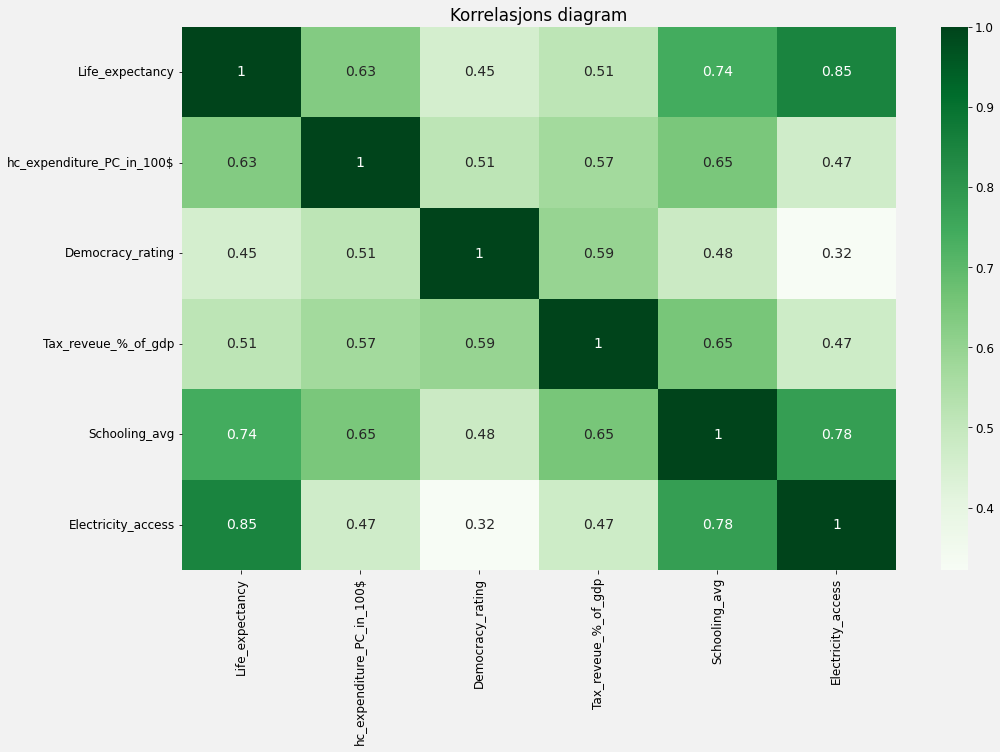

In [36]:
# Lager et varmekart basert på variablne i regresjonsmodellen m_mod1
df_heatmap = df.loc[:,["Life_expectancy","hc_expenditure_PC_in_100$",  "Democracy_rating", 
                       "Tax_reveue_%_of_gdp", "Schooling_avg", "Electricity_access"]]

sns.heatmap(df_heatmap.corr(), cmap="Greens", annot=True)
plt.title("Korrelasjons diagram")
plt.show()

Diagrammet over viser mulitpel modell 1 sine ulike variablers korrelasjon opp mot hverandre. Diagrammet speiler om midtverdiene som er helt positiv korrelert, siden de måler variabelen mot den selv. Diagrammet viser de samme verdiene som tabellen over, med et avgrenset antall variabler og en annen fremstilling.

Gjennom litt ulike analyser i denne multiple delen har vi sett på variabelen `hc_expenditure_PC_in_100$` som en indikator på om utgifter til helsevesenet har en effekt på forventet levealder. Vi har ikke klart å fastsette en konkret effekt vi kan si skyldes denne variabelen, men det har blitt presentert en rekke ulike bevis som gir grunnlag for å trekke en konklusjon om at variablen har en positiv effekt på forventet levealder. Etter en rekke multiple analyser ser vi at effekten til utgifter variabelen er betydelig mindre enn antatt. Det er vanskelig å estimere noe eksakt tall. Dette skyldes mengden variabler som forstyrrer og påvirker modellen, som hindrer meg i å trekke kausale konklusjoner rundt faktisk årsak og virkning, mellom forventet levealder og utgifter til helsevesen. 
<br>
<br>

## Falsk data og regresjonstilpassning

Formålet med denne delen av oppgaven er å teste modellen og ikke dataen. Først vil jeg gjenskape noe av dataen deretter vil jeg kjøre disse nye variablene gjennom en regresjonsmodell og se hvordan den lineære modellen passer vår data.

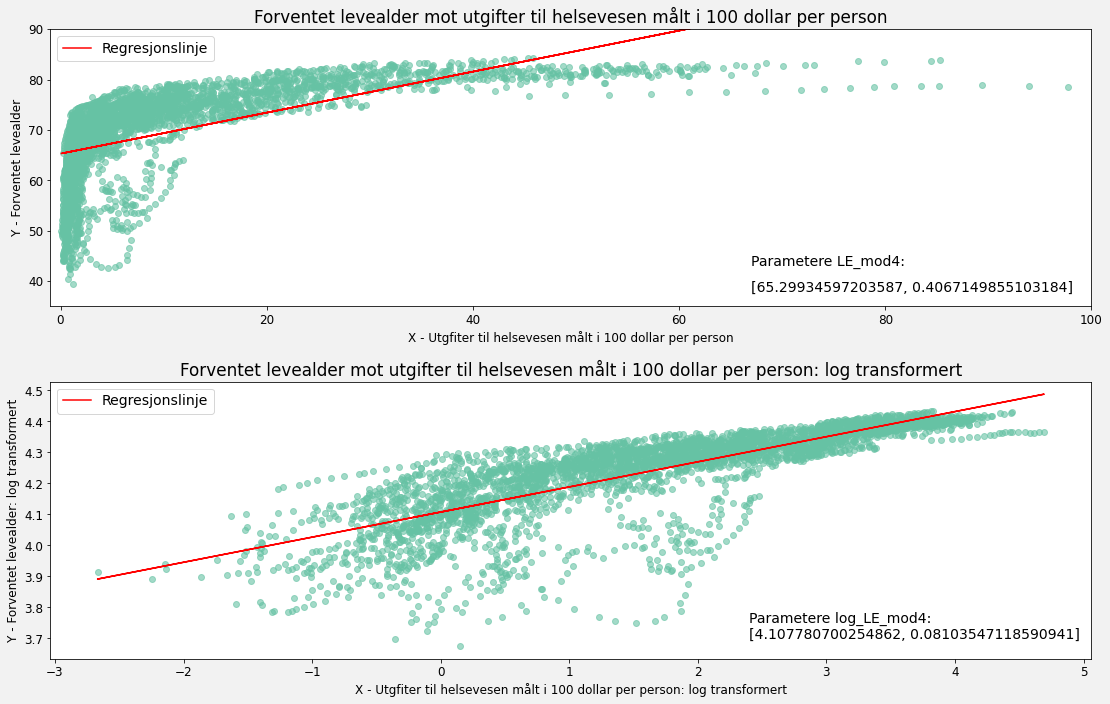

In [37]:
# Fastsetter variabler for log modellen sine parametere
log_a_hat = log_LE_mod4.params[0]
log_b_hat = log_LE_mod4.params[1]

fig, ax = plt.subplots(2)
ax[0].scatter(df["hc_expenditure_PC_in_100$"], df["Life_expectancy"], alpha=.6)
ax[0].plot(df["hc_expenditure_PC_in_100$"], a_hat + b_hat*df["hc_expenditure_PC_in_100$"], 
           color="red", label="Regresjonslinje")
ax[0].set_title("Forventet levealder mot utgifter til helsevesen målt i 100 dollar per person")
ax[0].set_ylabel("Y - Forventet levealder")
ax[0].set_xlabel("X - Utgfiter til helsevesen målt i 100 dollar per person")
ax[0].set_xlim(-1,100)
ax[0].set_ylim(35,90)
ax[0].text(x=67,y=43, s=("Parametere LE_mod4: "))
ax[0].text(x=67,y=38, s= [LE_mod4.params[0], LE_mod4.params[1]])
ax[0].legend()

ax[1].scatter(df["log_HC$"], df["log_LE"], alpha=.6)
ax[1].plot(df["log_HC$"], log_a_hat + log_b_hat*df["log_HC$"], color="red", label="Regresjonslinje")
ax[1].set_title("Forventet levealder mot utgifter til helsevesen målt i 100 dollar per person: log transformert")
ax[1].set_ylabel("Y - Forventet levealder: log transformert")
ax[1].set_xlabel("X - Utgfiter til helsevesen målt i 100 dollar per person: log transformert")
ax[1].text(x=2.4,y=3.75, s=("Parametere log_LE_mod4: "))
ax[1].text(x=2.4,y=3.7, s = [log_LE_mod4.params[0], log_LE_mod4.params[1]])
ax[1].legend()

plt.tight_layout()
plt.show()

Her trekker jeg frem noen spredningsplott som er vist tidligere. Som påpekt er ikke den lineære regresjonslinjen nødvendigvis den best tilpassede til vår data, som er noe av det vi skal undersøke nå. Jeg antar at forventet levealder har begrenset vekst, jeg velger å benyttte en funksjon for kurvetilpasning basert på parameterene a, b og c i denne formelen: <br>
`a*(x-b)^2+c`


In [38]:
# Funkjson som beregner beste kurve tilpaasning
from scipy.optimize import curve_fit

# Fjerner 'nan' verdier
df_noNa =  df.loc[df["log_HC$"].notna(),:]
df_noNa =  df_noNa.loc[df["log_LE"].notna(),:]

# Gjør om variablene til lister
hcd = list(df_noNa["log_HC$"])
life_exp = list(df_noNa["log_LE"])

# Funksjon som returnerer regresjonslinje
def model_f(x,a,b,c):
    return a*(x-b)**2+c

T = int(len(df_noNa))

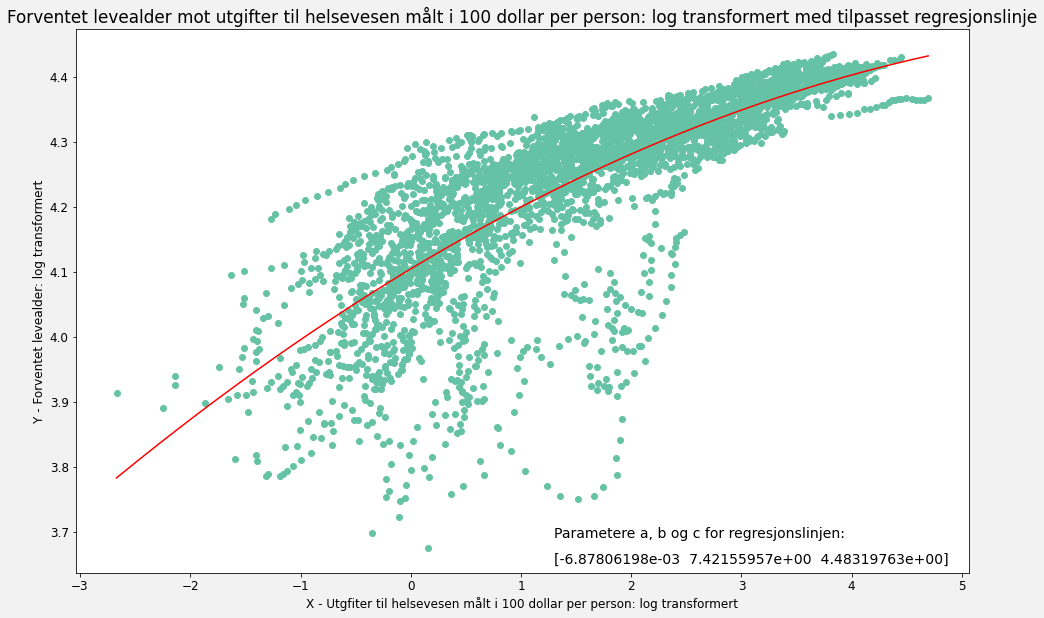

In [39]:
# Beregner og plotter beste tilpassede regresjonslinje
popt, pcov = curve_fit(model_f, hcd, life_exp, p0=[1,1,3.7], maxfev=100)

a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(hcd), max(hcd), T)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

fig, ax = plt.subplots()
plt.scatter(df["log_HC$"], df["log_LE"])
plt.plot(x_model, y_model, color="red")
plt.title("Forventet levealder mot utgifter til helsevesen målt i 100 dollar per person: log transformert med tilpasset regresjonslinje")
plt.ylabel("Y - Forventet levealder: log transformert")
plt.xlabel("X - Utgfiter til helsevesen målt i 100 dollar per person: log transformert")
plt.text(x=1.3, y=3.69, s="Parametere a, b og c for regresjonslinjen: ")
plt.text(x=1.3, y=3.65, s=popt)
plt.show()

In [40]:
#Beregner usikkerhet på parameterene
print("Usikkerhet på parameterene a, b og c: ")
print(np.sqrt(np.diag(pcov)))

Usikkerhet på parameterene a, b og c: 
[0.0007191  0.62056332 0.02445106]


Denne tilpassede regresjonslinjen har en synlig bedre passform. Funksjonen returnerer de parameterne som gir den laveste summen av kvadrerte residualer.

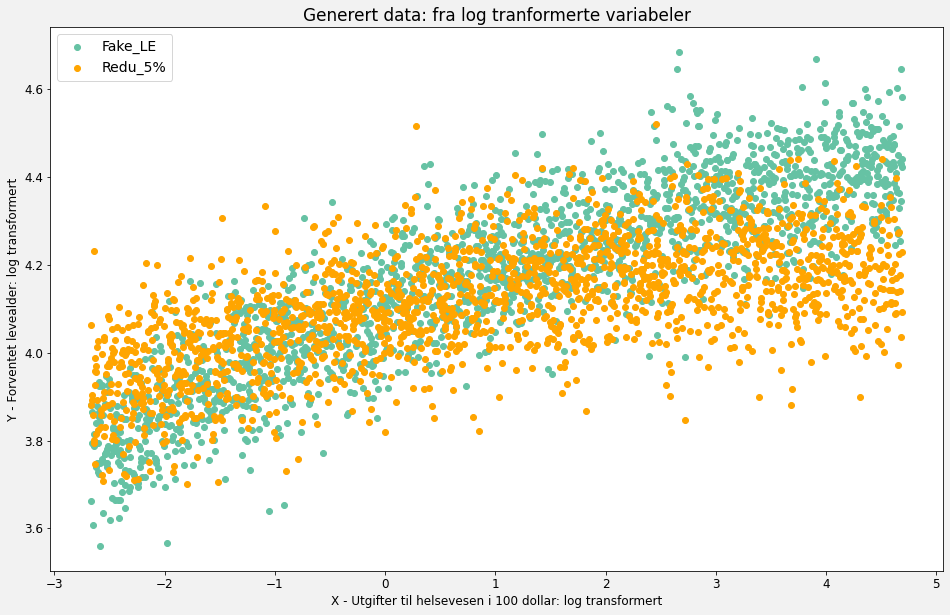

In [41]:
fake_LE_red = y_model -.05*x_model
redu_5 = np.random.randint(0,2, size=T)
fake_LE = y_model -.05*x_model*redu_5 + np.random.normal(0, .1, T)

fake_df = pd.DataFrame({"fake_LE": fake_LE, "fake_HC$": x_model, "redu_5": redu_5, "fake_LE_red": fake_LE_red})

one = fake_df.loc[fake_df["redu_5"] == 1, :]
zero = fake_df.loc[fake_df["redu_5"] == 0, :]

fig, ax = plt.subplots()
plt.scatter(zero["fake_HC$"], zero["fake_LE"], label="Fake_LE")
plt.scatter(one["fake_HC$"], one["fake_LE"], label="Redu_5%", color="orange")
plt.title("Generert data: fra log tranformerte variabeler")
plt.ylabel("Y - Forventet levealder: log transformert")
plt.xlabel("X - Utgifter til helsevesen i 100 dollar: log transformert")
plt.legend()
plt.show()

Over har jeg laget et spredningsplott med falsk data. Observasjonene er basert på de log-transformasjonen fra LE_mod4 modellen og er ikke helt like i form, men har noen likhetstrekk. De grønne punktene representerer den vanlige falske dataen, de oransje punktene representerer et fall på 5% i den genererte variabelen for log-transformert utgifter til helsevesen målt i 100 dollar. Jeg ønsket å skape et scenario der vi ser hvordan disse genererte variablene endrer forhold. <br>

Det vi ser basert på punktenes fordeling er ved lave utgiftsverdier er utslaget mindre i forhold til den originale dataen. Overaskende nok er den heller litt positiv enn negativ. Det vil si at med denne dataen vil en nedgang på utgiftsverdi med 5% være fordelaktig for forventet levealder. Så snur denne trenden, midtveis er fordelingen veldig lik og reduksjonen ser ut til å ha liten påvirkning. I de øvrigeutgifts verdiene har endringen en mer betydelig virkning og gitt trenden observasjonene avslutter i vil veldig ekstreme verdier avvike enda mer.

In [42]:
# Setter våre genererte variabler inn i regresjonsmodell
fake_mod1 = smf.ols("fake_LE~Q('fake_HC$')", data=fake_df).fit()
fake_mod2 = smf.ols("fake_LE~Q('fake_HC$') + redu_5", data=fake_df).fit()
log_LE_mod4


print("Parametere til den enkle log regresjonen:")
print(log_LE_mod4.params)
print("\n")
print("Parametere til den enkle falske regresjonen:")
print(fake_mod1.params)
print("\n")
print("Parametere til den multipple falske regresjonen:")
print(fake_mod2.params)

Parametere til den enkle log regresjonen:
Intercept       4.107781
Q('log_HC$')    0.081035
dtype: float64


Parametere til den enkle falske regresjonen:
Intercept        4.078094
Q('fake_HC$')    0.063770
dtype: float64


Parametere til den multipple falske regresjonen:
Intercept        4.104065
Q('fake_HC$')    0.063475
redu_5          -0.051302
dtype: float64


Jeg trekker frem både parameterne basert på en multippel og enkel regresjonsmodell, som kan sammenlignes med parameterne fra min enkel log-transformerte regresjonsmodell. Vi ser at den genererte dataen har noe dårligere koeffisient verdi enn log-modellen. <br>
En grunn til dette kan være hvordan observasjonene oppfører seg. Jeg har påpekt flere ganger hvordan utgifter-verdiene gir ulike utslag på forventet levealder. Dette gjelder også hos for log modellen. Dette skiller seg fra den mer jevne kurven som vises i de genererte figurene, og kan være en grunn til at påvirkningen er litt større. Det er derimot ikke så viktig for oss hvilken påvirkning og verdier denne modellen har siden det er falsk data. Derfor er det mer interessant å se på hvordan regresjonslinjene passer observasjonene.

In [43]:
# Lager variabler ut av regresjonsmodellens parametere
fake_df["y_fitted_redu_simple"] = fake_mod2.params[0] + fake_mod2.params[1]*fake_df["fake_HC$"] + fake_mod2.params[2]
fake_df["y_fitted_notRedu_simple"] = fake_mod2.params[0] + fake_mod2.params[1]*fake_df["fake_HC$"]  

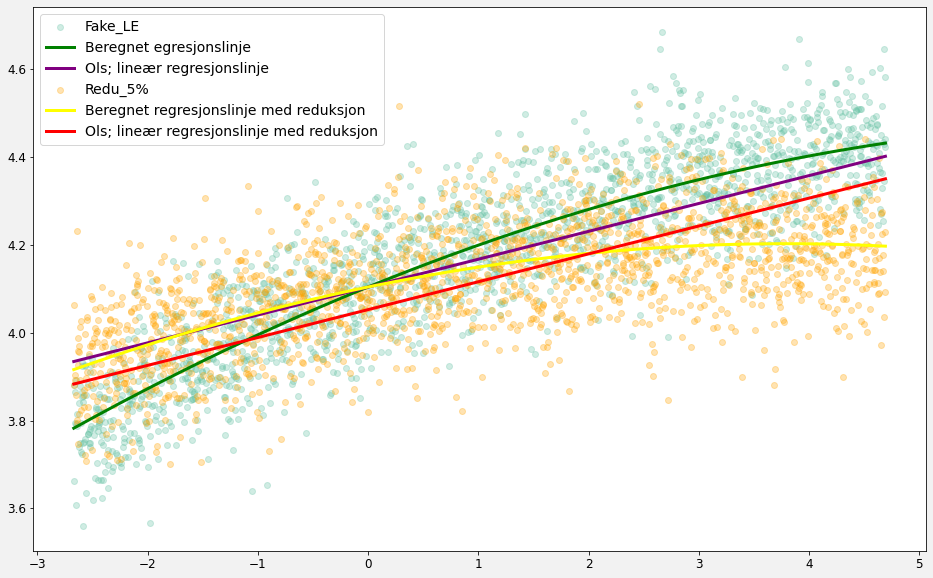

In [44]:
# Plotter figurene
fig, ax = plt.subplots()

plt.scatter(zero["fake_HC$"], zero["fake_LE"], label="Fake_LE", alpha=.3)
plt.plot(fake_df["fake_HC$"], y_model, color= "green", label="Beregnet egresjonslinje", lw=3)
plt.plot(fake_df["fake_HC$"], fake_df["y_fitted_notRedu_simple"], color="purple", 
         label="Ols; lineær regresjonslinje", lw=3)

plt.scatter(one["fake_HC$"], one["fake_LE"], label="Redu_5%", color="orange", alpha=.3)
plt.plot(fake_df["fake_HC$"], fake_df["fake_LE_red"], color="Yellow", 
         label="Beregnet regresjonslinje med reduksjon", lw=3)
plt.plot(fake_df["fake_HC$"], fake_df["y_fitted_redu_simple"], color="red", 
         label="Ols; lineær regresjonslinje med reduksjon", lw=3)

plt.legend()
plt.show()

Disse linjene kan virke noe rotete, men linjene skal ses i sammenheng med sitt par. Det vil si at gul/rød og grønn/lilla regresjonslinjer følger de samme observasjonene. Respektiv har begge settene et krysningspunkt i nærheten av sentrum på litt ulik side, generelt følger den lineære regresjonen observasjonene greit, men vi ser at i endene er det tydelige avvik fra de beregnede linjene og observasjonstrenden. I praksis betyr dette at observasjoner utenfor den samlingen vi har vil ha store avvik, men et slikt tilfelle er usannsynlig. Observasjonene som er samlet i vår regresjonsmodell er basert på data fra over 20 år og å ha noen observasjoner som avviker fra dette området ville vært overaskende, både i denne falske dataen og i vår originale modell.
<br>
<br>

## Diagnostikk og modellevaluering

Diagnostikk og modellevaluering brukes for å evaluere relativ passform og ekstern validitet av regresjonsmodellene vi har benyttet frem til nå.

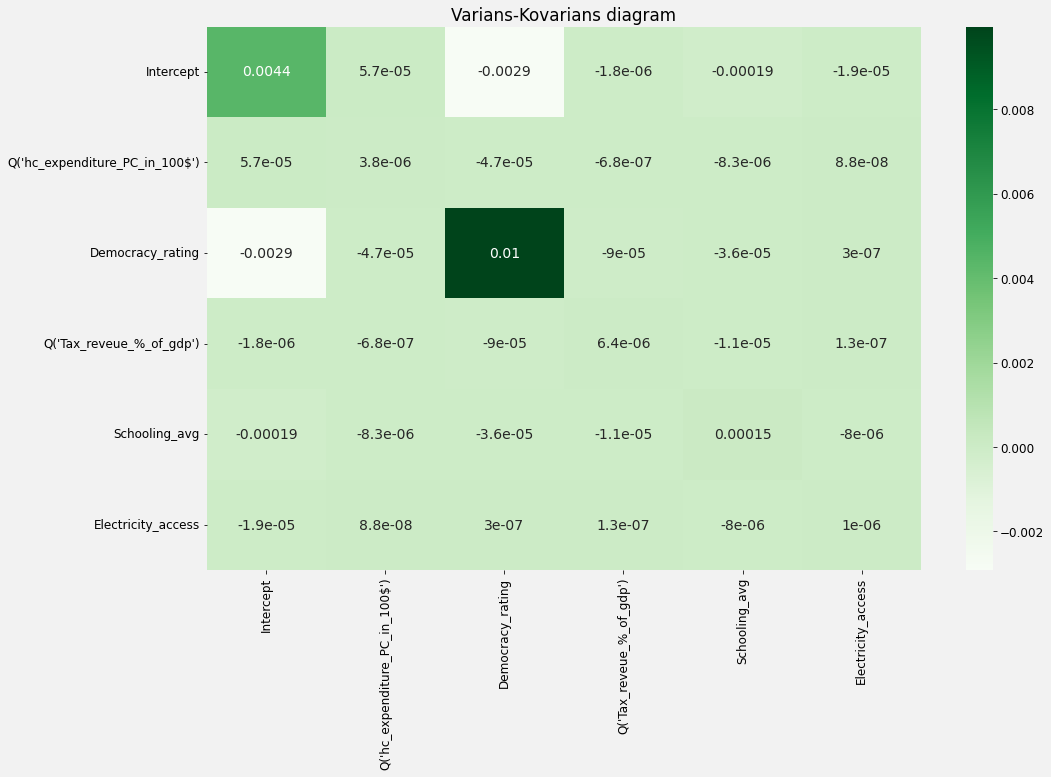

In [45]:
# Lager et varians-kovarians diagram
bs_vcov = m_mod1.cov_params(scale=1)
sns.heatmap(bs_vcov, cmap="Greens", annot=True)
plt.title("Varians-Kovarians diagram")
plt.show()

Dette varmekartet viser ulik kovarians mellom ulike variabler. Diagrammet skal tolkes på liknende måte til korrelasjonsdiagrammet. Formålet med en slik analyse er å se på om variablene har et positivt eller negativt forhold til hverandre. Tallenes faktiske verdi har i liten relevans for tolkning. Det mest relevante er å se på forholdet mellom forventet levealder og utgifter til helsevesen, som her igjen slår ut som et positivt forhold.

Et interessant moment er at de resterende variablene alle slår ut med et negativt forhold til forventet levealder som er overaskende, særlig for variablene `Electricity_access` og `Democracy_rating` som begge har positiv korrelasjon i regresjonsmodellen.

#### Generert regresjon: Tester passform
<br>

In [46]:
# Regresjons simulasjons funksjon
def regSim(regMod): 
    
    #Trekker ut verdiene fra regresjonsmodellen
    nmk = regMod.df_resid #n-k
    sigma_hat = np.sqrt(regMod.mse_resid)
    bs_vcov = regMod.cov_params(scale=1)
    bs = regMod.params
    
    #Genererer nye verdier
    sigma_sim = sigma_hat*np.sqrt((nmk/np.random.chisquare(nmk,1)))
    V_sim = np.array(bs_vcov) * sigma_sim**2
    bs_sim = np.random.multivariate_normal(bs, V_sim, 1)
    
    return([bs_sim.flatten(), sigma_sim])

In [47]:
# Lager 20 ulike lister med simulerte verdier for forventet levealder 
T = 20
nsim = 100


x_line = np.linspace(0 , T, T)
x_line_m = x_line - np.mean(x_line)

LE_fs = [] 

for s in range(nsim):
    param_sim = regSim(LE_mod4) 
    bs_sim = param_sim[0]
    sigma_sim = param_sim[1]
    LE_fs.append(bs_sim[0] + bs_sim[1]*x_line_m  + np.random.normal(0,sigma_sim,T))

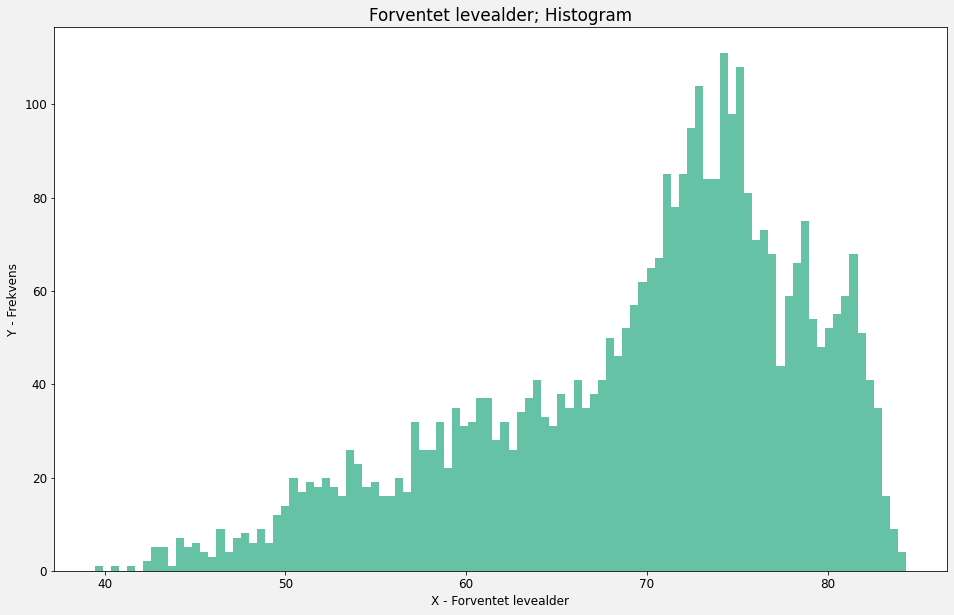

In [48]:
# Trekker frem histogrammet for forventet levealder igjen
fix, ax = plt.subplots()
df.Life_expectancy.plot.hist(bins=100, ax=ax)
plt.title("Forventet levealder; Histogram")
plt.ylabel("Y - Frekvens")
plt.xlabel("X - Forventet levealder")
plt.show()

In [49]:
# Gjør om listene til datarammer
LEf_df = pd.DataFrame(np.transpose(LE_fs))

In [50]:
# Endrer kolonne navnene 
colnames = ["sim" + str(i) for i in range(100)]
LEf_df.columns = colnames


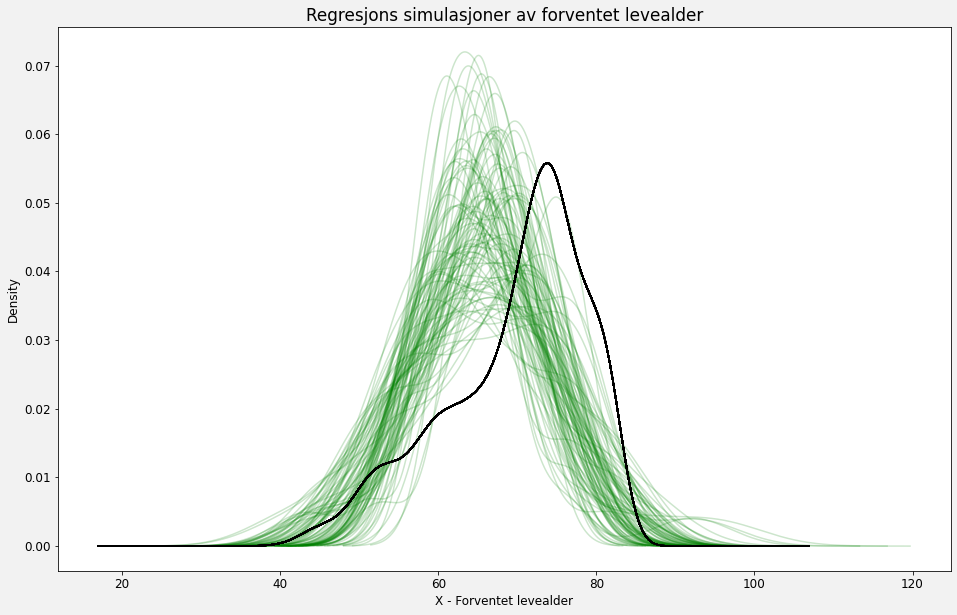

In [51]:
# Lager en figur som sammenligner simulasjonene og den faktiske dataen
fig, ax=plt.subplots()
plt.title("Regresjons simulasjoner av forventet levealder")
plt.xlabel("X - Forventet levealder")
plt.ylabel("Y - Tetthet")
          
for name, values in LEf_df.iteritems():
    values.plot.density(ax=ax, alpha=.2, color="green")
    df.Life_expectancy.plot.density(ax=ax, color="black")


I denne analysen benytter jeg den enkle regresjonsmodellen LE_mod4. Jeg har her generert data basert på modellens parametere og ønsker å måle modellens passform opp mot faktiske verdier. Vi ser at passformen til disse simulerte verdiene ikke treffer helt, de faktiske observasjonene er tydelig venstreskjeve. Det er tydelig at skjevheten og vekting av den originale dataen ikke helt klarer å bli gjenskapt av den genererte dataen, men ved veldig mange simulasjoner som jeg har gjennomført over ser vi at det finnes noen av disse som er veldig nærme, til tross for at den generelle trenden av data plasseres noe utenfor. Derfor vil jeg konkludere at passformen til denne regresjonsmodellen er ok.

#### Residual figur

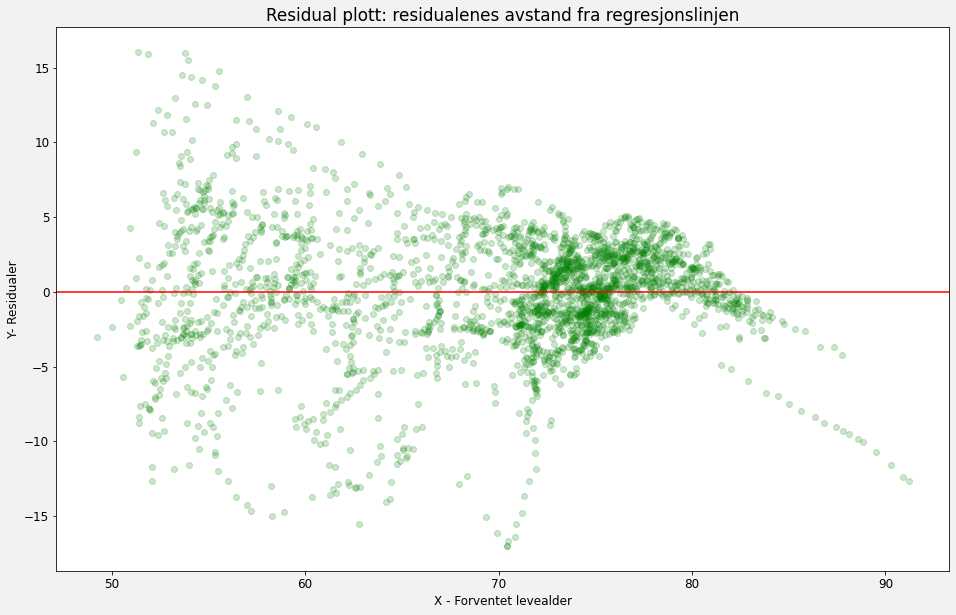

In [52]:
# Plotter residualene i vår modell 
fig, ax = plt.subplots()
ax.scatter(m_mod1.fittedvalues, m_mod1.resid, alpha=.2, color="green")
ax.axhline(0, color="red")
plt.title("Residual plott: residualenes avstand fra regresjonslinjen")
plt.ylabel("Y- Residualer")
plt.xlabel("X - Forventet levealder")        
plt.show()

Residual observasjonene skal tolkes som avstanden fra den predikerte verdien til den faktisk observerte. Den rød linjen representerer regresjonslinjen og optimalt burde residualene ligge nært denne uten et tydelige mønster, grupperinger eller uteliggere. Observasjonene former en slags kjegle med noen tydelige uteliggere. Observasjonene tolkes gjennom avstanden til regresjonslinjen, for å forklare dette kan vi se på linjen av observasjoner nede i figurens høyre hjørne. Vi ser en tydelig negativ trend på noen av observasjonene. Dette betyr at regresjonsmodellen for disse verdiene har predikert en stadig høyere forventet levealder uten at den faktiske verdien har økt i samme takt. Gitt informasjon fra tidligere analyser kan vi skape hypoteser om dette typisk kan være USA, som i mange av våre variabler har alle mulige forutsetninger for å score ekstremt høyt, men likvel ikke gjør dette. Residualene skal altså tolkes motsatt av deres presenterte verdi. Et negativt residual vil si at modellen predikerte et for høyt tall, det motsatte gjelder da for positive residualer.

Flere av problemene resultatet viser, sikter antageligvis til heteroscedastisitet, som beskriver at residualene bli større etter hvert som prediksjonene går fra større til mindre. I dette tilfellet har modellen problemer med å predikere den forventede levealderen riktig når den har en lavere verdi. Med andre ord modellen, gitt de variablene den har mottatt, klarer bedre og predikere forventet levealder i land med høy forventet levealder. Heteroscedastisitet behøver ikke være et problem, men kan gi oss gode tegn på hvordan modellen kan forbedres. Modellen kan stort sett forbedres gjennom enten transformering av variabler eller ved inkludering av noen variabler som bidrar til å bedre predikere de lavere verdiene av forventet levealder.
<br>

#### AIC og BIC Model-evaluering
<br>

In [53]:
# Gjentar regresjons modellene
LE_mod4 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$')", data=df).fit()
m_mod1 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$') + Democracy_rating + Q('Tax_reveue_%_of_gdp') + Schooling_avg + Electricity_access", data=df).fit()
m_mod2 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$') + Avg_yearly_work_hours + Terrorism_deaths + gdp_PC + Homicides_deaths + Schooling_avg + Electricity_access + Q('Tax_reveue_%_of_gdp')",data=df).fit()
m_mod3 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$') + Population + Avg_yearly_work_hours + Child_mortality_per100 + Democracy_rating + Terrorism_deaths + gdp_PC+Homicides_deaths+HDI + Schooling_avg + Electricity_access + Q('Tax_reveue_%_of_gdp')", data=df).fit()

In [54]:
# Henter ut AIC verdier
print("AIC m_mod 1 ", m_mod1.aic)
print("AIC m_mod 2 ", m_mod2.aic)
print("AIC m_mod 3 ", m_mod3.aic)
print("AIC LE_mod 4", LE_mod4.aic)

AIC m_mod 1  14787.59834199306
AIC m_mod 2  3139.7944621237116
AIC m_mod 3  2422.6283758815453
AIC LE_mod 4 23953.988952765605


In [55]:
# Henter ut BIC verdier
print("BIC m_mod 1 ", m_mod1.bic)
print("BIC m_mod 2 ", m_mod2.bic)
print("BIC m_mod 3 ", m_mod3.bic)
print("BIC LE_mod 4", LE_mod4.bic)

BIC m_mod 1  14822.835359043214
BIC m_mod 2  3179.8912491937726
BIC m_mod 3  2480.52550086715
BIC LE_mod 4 23966.343422536625


AIC og BIC er verdier som måler en modells passform, størrelsen på disse tallene sees på som irrelevant, vårt fokus vil ligge på deres relative størrelse i forhold til hverandre. Modellen som har de laveste AIC eller BIC verdier regnes som den modellen med best passform. Av de inkluderte modellene har `m_mod3` den laveste verdien og dermed antatt best passform. Dette er også regresjonsmodellen med flest antall variabler. BIC og AIC er laget for å avveie forholdet mellom passform og kompleksitet, normalt straffer de modeller med flere variabler, men i dette tilfellet beregnes det at den mest komplekse modellen også har best passform. <br>
Den enkle regresjonsmodellen vurderes her til å ha en relativt dårlig passform som strider mot resultatene jeg konkluderte med fra regresjonssimulasjonen. `m_mod2` har også betydelig lavere verdi enn `m_mod1`. Det burde derfor vurderes om dette kanskje er den mest representative modellen.

#### Forbedring av regresjonsmodellene 
Diagnostikk og modell evaluering er ikke bare et godt virkemiddel for å reflektere og feilsøke, men kan også brukes til å forbedre vår regresjonsmodell. Jeg skal ta utgangspunkt i residualfiguren for å se hvilke forbedringer vi kan trekke fra den analysen. Først vil jeg se hvilke endringer variablene som måler dødsfall fra usikkert vann og barnedødelighet har på både m_mod1 og m_mod2.

In [56]:
# Jeg lager en rekke ny multiple regresjonsmodeller for å se om noen nye variabler kan bidra til å bedre predikere
m_mod1_t1 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$') + Democracy_rating + Q('Tax_reveue_%_of_gdp') + Schooling_avg + Electricity_access + Unsafe_water_deaths", data=df).fit()
m_mod1_t2 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$') + Democracy_rating + Q('Tax_reveue_%_of_gdp') + Schooling_avg + Electricity_access + Child_mortality_per100", data=df).fit()
m_mod2_t1 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$') + Avg_yearly_work_hours + Terrorism_deaths + gdp_PC + Homicides_deaths + Schooling_avg + Electricity_access + Q('Tax_reveue_%_of_gdp') + Unsafe_water_deaths",data=df).fit()
m_mod2_t2 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$') + Avg_yearly_work_hours + Terrorism_deaths + gdp_PC + Homicides_deaths + Schooling_avg + Electricity_access + Q('Tax_reveue_%_of_gdp') + Child_mortality_per100",data=df).fit()

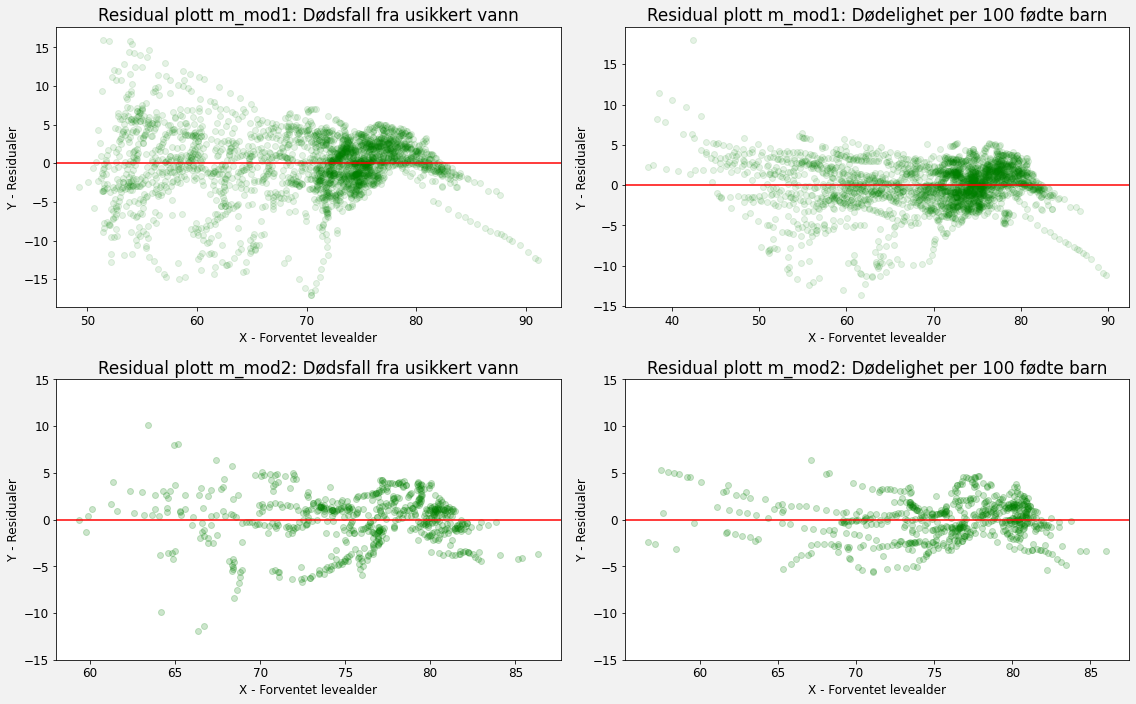

In [57]:
# Lager en rekke plotts der jeg legger til en ny variabel med utgangspunkt i m_mod1
# Øker synligehten på 
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(m_mod1_t1.fittedvalues, m_mod1_t1.resid, alpha=.1, color="green")
ax[0,0].axhline(0, color="red")
ax[0,0].set_ylabel("Y - Residualer")
ax[0,0].set_xlabel("X - Forventet levealder")
ax[0,0].set_title("Residual plott m_mod1: Dødsfall fra usikkert vann")

ax[0,1].scatter(m_mod1_t2.fittedvalues, m_mod1_t2.resid, alpha=.1, color="green")
ax[0,1].axhline(0, color="red")
ax[0,1].set_ylabel("Y - Residualer")
ax[0,1].set_xlabel("X - Forventet levealder")
ax[0,1].set_title("Residual plott m_mod1: Dødelighet per 100 fødte barn")

ax[1,0].scatter(m_mod2_t1.fittedvalues, m_mod2_t1.resid, alpha=.2, color="green")
ax[1,0].axhline(0, color="red")
ax[1,0].set_ylabel("Y - Residualer")
ax[1,0].set_xlabel("X - Forventet levealder")
ax[1,0].set_title("Residual plott m_mod2: Dødsfall fra usikkert vann")
ax[1,0].set_ylim(-15,15)

ax[1,1].scatter(m_mod2_t2.fittedvalues, m_mod2_t2.resid, alpha=.2, color="green")
ax[1,1].axhline(0, color="red")
ax[1,1].set_ylabel("Y - Residualer")
ax[1,1].set_xlabel("X - Forventet levealder")
ax[1,1].set_title("Residual plott m_mod2: Dødelighet per 100 fødte barn")
ax[1,1].set_ylim(-15,15)

plt.tight_layout()       
plt.show()

Spredningnen i residualene er betydelig senket når ytterligere variabler blir inkludert. En svakhet er at vi også da har færre observasjoner. Av de to variablene er det tydelig at barnedødelighet gir modellen bedre prediksjoner, siden både m_mod1 og m_mod2 har et bedre resultat i figurene til høyre. <br>
Videre kan vi også se om transformering av vår avhengige variabel forventet levealder kan bidra til å forbedre vår modell.

In [58]:
# Benytter log transformerte forventede levealder i test3 modellen 
log_m1_t2 = smf.ols("log_LE~Q('hc_expenditure_PC_in_100$') + Democracy_rating + Q('Tax_reveue_%_of_gdp') + Schooling_avg + Electricity_access + Child_mortality_per100", data=df).fit()
log_m2_t2 = smf.ols("log_LE~Q('hc_expenditure_PC_in_100$') + Avg_yearly_work_hours + Terrorism_deaths + gdp_PC + Homicides_deaths + Schooling_avg + Electricity_access + Q('Tax_reveue_%_of_gdp') + Child_mortality_per100",data=df).fit()

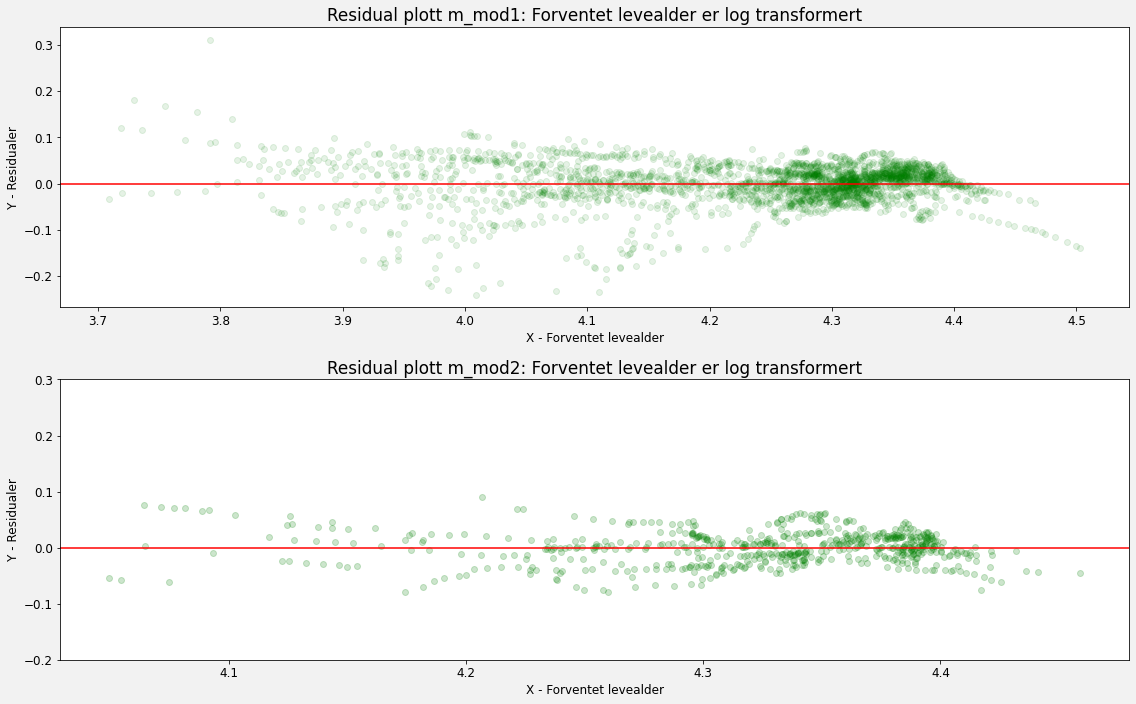

In [59]:
fig, ax = plt.subplots(2)
ax[0].scatter(log_m1_t2.fittedvalues, log_m1_t2.resid, alpha=.1, color="green")
ax[0].axhline(0, color="red")
ax[0].set_ylabel("Y - Residualer")
ax[0].set_xlabel("X - Forventet levealder")
ax[0].set_title("Residual plott m_mod1: Forventet levealder er log transformert")

ax[1].scatter(log_m2_t2.fittedvalues, log_m2_t2.resid, alpha=.2, color="green")
ax[1].axhline(0, color="red")
ax[1].set_ylabel("Y - Residualer")
ax[1].set_xlabel("X - Forventet levealder")
ax[1].set_title("Residual plott m_mod2: Forventet levealder er log transformert")
ax[1].set_ylim(-0.2,0.3)
plt.tight_layout()       
plt.show()

Log-transformasjonen har samlet residualene rundt regresjonslinjen og resultatene vi har nå er betydelig bedre enn det vi begynte med. Vi ser på m_mod1 at prediksjonene i midtpartiet, jeg vil anta i intervallet 55-75 år som forventet levealder, stadig er noe høyere en faktiske verdier.

In [60]:
# Trekker ut koefisientene fra de nye og forbedrede regresjonsmodellene.
print("Log transformert avhengig variabel av m_mod1_t2: ")
print(log_m1_t2.params)
print("\n")
print("Log transformert avhengig variabel av m_mod2_t2: ")
print(log_m2_t2.params)

Log transformert avhengig variabel av m_mod1_t2: 
Intercept                         4.271054
Q('hc_expenditure_PC_in_100$')    0.002144
Democracy_rating                  0.045000
Q('Tax_reveue_%_of_gdp')         -0.001239
Schooling_avg                    -0.007101
Electricity_access                0.001234
Child_mortality_per100           -0.024878
dtype: float64


Log transformert avhengig variabel av m_mod2_t2: 
Intercept                         4.535439e+00
Q('hc_expenditure_PC_in_100$')    8.104981e-04
Avg_yearly_work_hours            -4.385341e-05
Terrorism_deaths                  1.528238e-05
gdp_PC                            9.746463e-07
Homicides_deaths                 -1.200146e-03
Schooling_avg                    -9.658870e-03
Electricity_access                6.285123e-05
Q('Tax_reveue_%_of_gdp')         -6.677336e-04
Child_mortality_per100           -3.134792e-02
dtype: float64


Igjen er vi mest interessert i `hc_expenditure_PC_in_100$` påvirkning på forventet levealder. Vi kan regne oss frem til at det i m_mod1 ved en enhets økning i vår uavhengige variabel gir en økning på 0,21% i forventet levealder, noe som ikke er spesielt mye. I m_mod2_t2 er påvirkningen på lave 0,081%. Vi ser at begge modellene inneholder variabler som har en større påvirkningskraft enn vår interesse variabel.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Tidsrekkeregresjon

Først i denne tidsrekkeregresjonen vil jeg lage en simplifisert analyse som ser på hvor anvhengig forventet levealder er av fjordårets verdi. Vi kan allerede nå anta at dette burde være et relativt høyt tall.

In [61]:
## Hvor avhengig er forventet levealder i år av fjoråret. simplifisert.
# Fjerner nan verdier
df_noNa =  df.loc[df["Life_expectancy"].notna(),:]

# Målet med tidsrekke regresjon er å se endringen i forventet levealder over tid,
# jeg har derfor tatt utgangspunkt i gjennomsnittet av forventet levealder hvert år.
LE_mean = df_noNa.groupby("Year")["Life_expectancy"].mean()
LE_mean = pd.DataFrame(LE_mean)

HCD_mean = df_noNa.groupby("Year")["hc_expenditure_PC_in_100$"].mean()
HCD_mean = pd.DataFrame(HCD_mean)

mean_df = pd.merge(LE_mean, HCD_mean, how="left", left_index=True, right_index=True)

# Lager en variabel for forventet levealder forskjøvet et år.
LE_mean["LE_l1"] = LE_mean.Life_expectancy.shift(periods=1)

# Gjentar LE_mod4
LE_mod4 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$')", data=df).fit()

# Lager regresjonsmodell fra gjennomsnittsdataen
mean_LE_mod4 = smf.ols("Life_expectancy~Q('hc_expenditure_PC_in_100$')", data=mean_df).fit()

# Regresjonsmodell som viser endring i forventet levealder når fjorårets forventet levealder øker med en.
LE_shift_mod = smf.ols("Life_expectancy~LE_l1", data=LE_mean).fit()

# Printer resultater
print("LE_mod4: ")
print(LE_mod4.params)
print("\n")
print("Endring i forventet levealder gitt at fjordårets forventet levealder øker med en: ")
print(LE_shift_mod.params)

LE_mod4: 
Intercept                         65.299346
Q('hc_expenditure_PC_in_100$')     0.406715
dtype: float64


Endring i forventet levealder gitt at fjordårets forventet levealder øker med en: 
Intercept    1.061262
LE_l1        0.989153
dtype: float64


Som forventet er fjorårets verdi svært korrelert, men generelt viser modellen en trend av minimal svekkende vekst. Tolkningne av denne verdien er, gitt en økning på 1 år i fjorårest verdi, at årets verdi vil øke med 0.98 år.

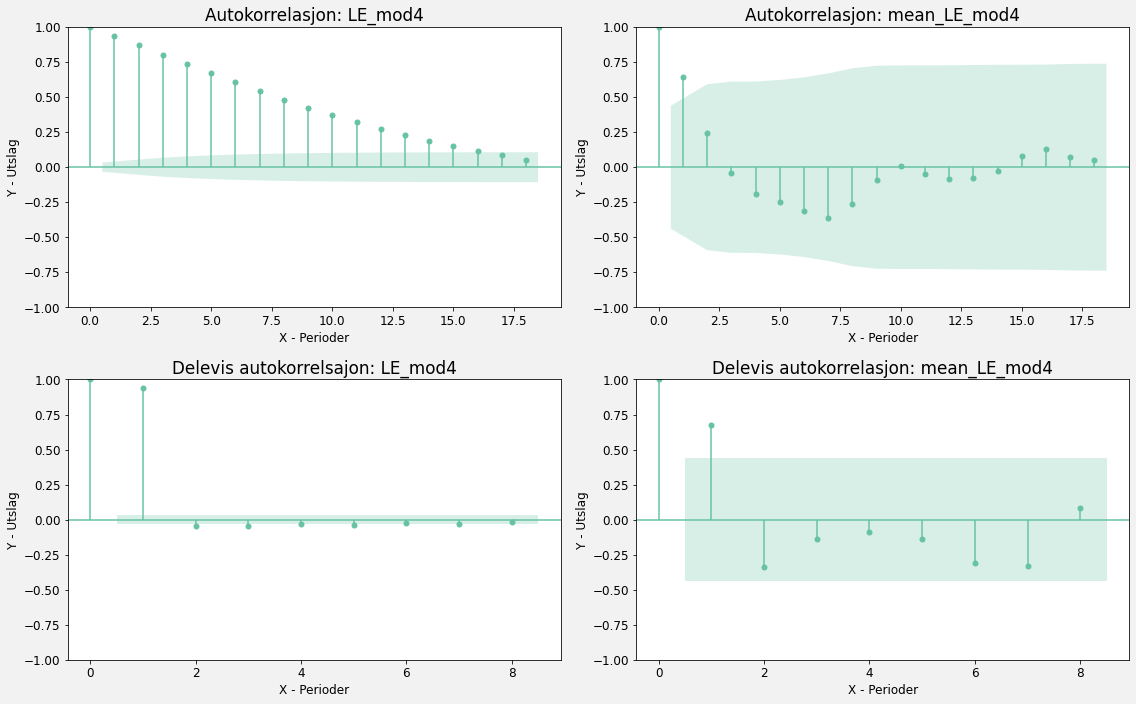

In [62]:
# Importerer modeller som kan gjennomføre en enkel tidsrekke regresjon.
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,2)
plot_acf(LE_mod4.resid, lags=18, ax=ax[0,0])
ax[0,0].set_title("Autokorrelasjon: LE_mod4")
ax[0,0].set_xlabel("X - Perioder")
ax[0,0].set_ylabel("Y - Utslag")

plot_acf(mean_LE_mod4.resid, lags=18, ax=ax[0,1])
ax[0,1].set_title("Autokorrelasjon: mean_LE_mod4")
ax[0,1].set_xlabel("X - Perioder")
ax[0,1].set_ylabel("Y - Utslag")

plot_pacf(LE_mod4.resid, lags=8, ax=ax[1,0])
ax[1,0].set_title("Delevis autokorrelsajon: LE_mod4")
ax[1,0].set_xlabel("X - Perioder")
ax[1,0].set_ylabel("Y - Utslag")

plot_pacf(mean_LE_mod4.resid, lags=8, ax=ax[1,1])
ax[1,1].set_title("Delevis autokorrelasjon: mean_LE_mod4")
ax[1,1].set_xlabel("X - Perioder")
ax[1,1].set_ylabel("Y - Utslag")
plt.tight_layout()
plt.show()

Autokorrelasjon modellen skal vise hvordan et sjokk vil påvirke en regresjonsmodell. En gradvis avtagning som vi ser i figur[0,0] er et tegn på at sjokket vil ha en tydelig påvirkning på verdien over lengere tid. Denne figuren er basert på data fra alle land i alle år. Ser vi til høyre for dette på figuren, som har gjennomsnittlig data, vil sjokket ganske drastisk falle og slå ut på motsatt side av spekteret. Dette kan tolkes som at på global basis vil et sjokk som en krig eller epidemi ikke vedvare utover hendelsesperioden. Datasettet inneholder ikke perioder globalt hvor dette har vært et stort problem og vi vet fra realiteten at særlig internt i land vil kriger, epidemier og lignende kunne få drastiske konsekvenser for et land, særlig i de neste 3-6 årene. Det kan derimot tenkes at på et globalt nivå vil disse sjokkene jevnes ut. 

Delevis autokorrelasjons modellen har som formål å fjerne de indirekte korrelasjonene og tar da kun utgangspunkt i direkte korrelasjoner mellom etterslepene. Det er veldig vanlig at denne figuren har en betydelig mer drastisk endring, fordi de vedvarende effektene som indirekte korrelasjoner ofte har ikke regnes med som i Autocorrelation modellen. Vi ser i figur[1,0] at nettopp dette skjer. Etter periode 1 er det ingen antydninger til noe sjokk. 

Generelt ser vi at konfidensintervallet er betydelig høyere på den gjennomsnittlige dataen, denne dataen viser også at sjokket kun er merkbart en periode.

In [63]:
from statsmodels.tsa.stattools import adfuller

# Kjører en adf test; ønsker og se om dataen er å regne som stabil eller ikke
dftest1 = adfuller(LE_mean["Life_expectancy"], autolag="AIC") 
print("ADF verdien: ", dftest1[0])
print("P-verdien: ", dftest1[1])
print("Antall etterslep: ", dftest1[2])
print("Antallet observasjoner brukt til ADF regresjon og kritisk verdi kalulasjon: ", dftest1[3])
print("Kritiske verdier: ")
for key, val in dftest1[4].items():
    print("\t", key, ": ", val)

ADF verdien:  -2.3795977329316615
P-verdien:  0.14757778647588882
Antall etterslep:  8
Antallet observasjoner brukt til ADF regresjon og kritisk verdi kalulasjon:  11
Kritiske verdier: 
	 1% :  -4.223238279489106
	 5% :  -3.189368925619835
	 10% :  -2.729839421487603


Det vi er ute etter ved en slik test er å se om dataen vi skal bruke er å regne som stasjonær eller ikke. Siden p-verdien er over 0.05 pleier man tradisjonelt å konkludere at denne modellen ikke er stasjonær og vil derfor kunne produsere dårlige resultater videre. Jeg velger å ignorere dette av to grunner: Jeg har et ønske om å gjennomføre en tidsrekkeregresjon, fordi det vil gi nyttig informasjon og bidrar til å fremstille effekten utgifter til helsevesen har på forventet levealder på en annen måte.
I tillegg til dette er også mengden data i dette settet veldig lite og det er fullt mulig at konklusjonen om at dataen ikke er stasjonær er basert på for få datapunkter.
<br>
<br>

In [64]:
# instalerte og importerer pmdarima.auto_arima

from pmdarima import auto_arima

In [65]:
# Bruker pmdarima for å finne den beste kombinasjonen av spesifikasjoner.
stepwise_fit = auto_arima(LE_mean["Life_expectancy"], trace=True, supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-41.861, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-39.542, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-38.934, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-38.287, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12.228, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-43.827, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-39.933, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-38.497, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-38.719, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 2.908 seconds


In [66]:
# Importerer ARIMA modellen
from statsmodels.tsa.arima.model import ARIMA

In [67]:
arimaMod = ARIMA(LE_mean["Life_expectancy"], order=(1,1,2), exog=HCD_mean).fit()
arimaMod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Life_expectancy   No. Observations:                   20
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  25.172
Date:                Sat, 17 Dec 2022   AIC                            -40.345
Time:                        10:48:14   BIC                            -35.623
Sample:                             0   HQIC                           -39.546
                                 - 20                                         
Covariance Type:                  opg                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
hc_expenditure_PC_in_100$     0.0671      0.056      1.202      0.229      -0.042       0.177
ar.L1                         0.9642      0.065     14.841      0.000       0.837       1.092
ma.L1                        -0.8365      0.744     -1.125      0.261      -2.294       0.621
ma.L2                         0.9673      1.846      0.524      0.600      -2.652       4.586
sigma2                        0.0029      0.005      0.552      0.581      -0.007       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.94   Prob(JB):                         0.60
Heteroskedasticity (H):               0.48   Skew:                             0.41
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Modellen gir veldig høye koeffisient-verdier, som betyr at prediskjonene i stor grad treffer eller er veldig nærme faktisk data.

In [68]:
# Lager prediksjons variabler
pred = arimaMod.predict( typ="levels")

pred = pd.DataFrame(pred)
pred = pred.iloc[1:,:]
LE_mean = LE_mean.iloc[1:,:]
HCD_mean = HCD_mean.iloc[1:,:]

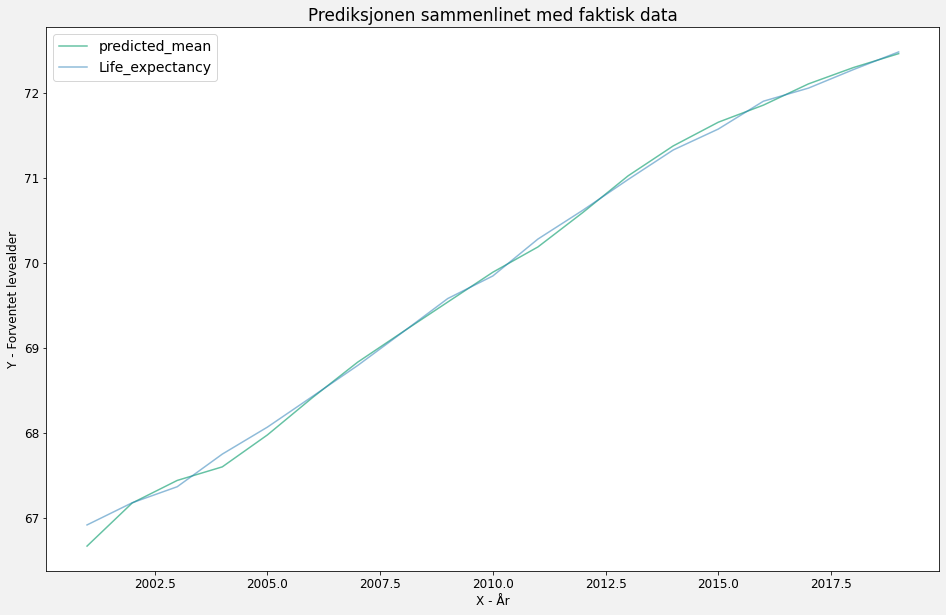

In [69]:
pred.plot(legend=True, alpha=1)
LE_mean["Life_expectancy"].plot(legend=True, alpha=.5)
plt.title("Prediksjonen sammenlinet med faktisk data")
plt.xlabel("X - År")
plt.ylabel("Y - Forventet levealder")
plt.show()

Her visualiserer vi resultatene fra ARIMA modellen, vi ser at prediksjonene er veldig nærme faktisk data, særlig i perioden etter 2006.

In [70]:
# Lager en fremtidsprediksjon, exog verdier beregnet fra gjennomsnitts økning
forecast = arimaMod.get_forecast(steps=6, exog=[15.67,16.132,16.595,17.058,17.521,17.984]).summary_frame()
forecast = forecast.reset_index()
forecast["Years"] = [2019, 2020, 2021, 2022, 2023, 2024]                   

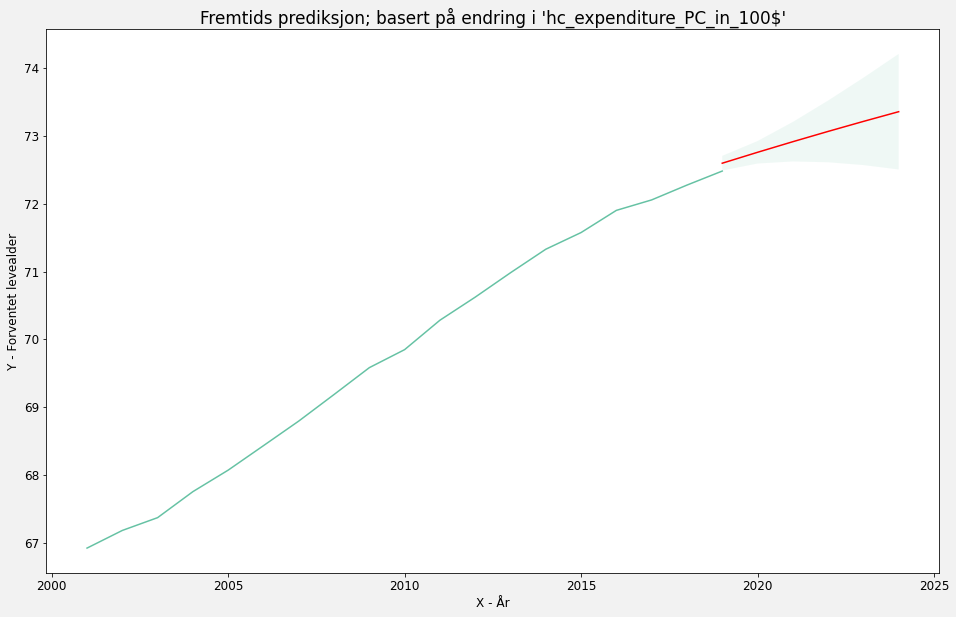

In [71]:
fig, ax = plt.subplots()
ax.plot(forecast["Years"], forecast["mean"], color="red")
ax.fill_between(forecast["Years"], forecast["mean_ci_lower"], forecast["mean_ci_upper"], alpha=.1)
LE_mean["Life_expectancy"].plot(ax=ax)
plt.ylabel("Y - Forventet levealder")
plt.xlabel("X - År")
plt.title("Fremtids prediksjon; basert på endring i 'hc_expenditure_PC_in_100$'")
plt.show()

Denne modellen predikerer et fremtidsbilde frem mot 2024 og er basert på gjennomsnittsøkningen vi har sett i perioden 2000 til 2019. Jeg vil tolke modellen nærmere ved neste figur.

In [72]:
# Gjennomfører prediskjoner av ulike scenarioer
arimaMod2 = ARIMA(LE_mean["Life_expectancy"], order=(1,1,2), exog=HCD_mean).fit()
forecast2 = arimaMod2.get_forecast(steps=6, exog=[15.67,17.52,19.35,21.2,23.05,24.9]).summary_frame()
forecast2 = forecast2.reset_index()
forecast2["Years"] = [2019, 2020, 2021, 2022, 2023, 2024]

arimaMod3 = ARIMA(LE_mean["Life_expectancy"], order=(1,1,2), exog=HCD_mean).fit()
forecast3 = arimaMod3.get_forecast(steps=6, exog=[15.67,14.95,14.49,14.03,13.57,13.11]).summary_frame()
forecast3 = forecast3.reset_index()
forecast3["Years"] = [2019, 2020, 2021, 2022, 2023, 2024]

arimaMod4 = ARIMA(LE_mean["Life_expectancy"], order=(1,1,2), exog=HCD_mean).fit()
forecast4 = arimaMod4.get_forecast(steps=6, exog=[15.67,13.82,11.97,10.12,8.27,6.42]).summary_frame()
forecast4 = forecast4.reset_index()
forecast4["Years"] = [2019, 2020, 2021, 2022, 2023, 2024]

arimaMod5 = ARIMA(LE_mean["Life_expectancy"], order=(1,1,2), exog=HCD_mean).fit()
forecast5 = arimaMod5.get_forecast(steps=6, exog=[15.67,15.67,15.67,15.67,15.67,15.67]).summary_frame()
forecast5 = forecast5.reset_index()
forecast5["Years"] = [2019, 2020, 2021, 2022, 2023, 2024]

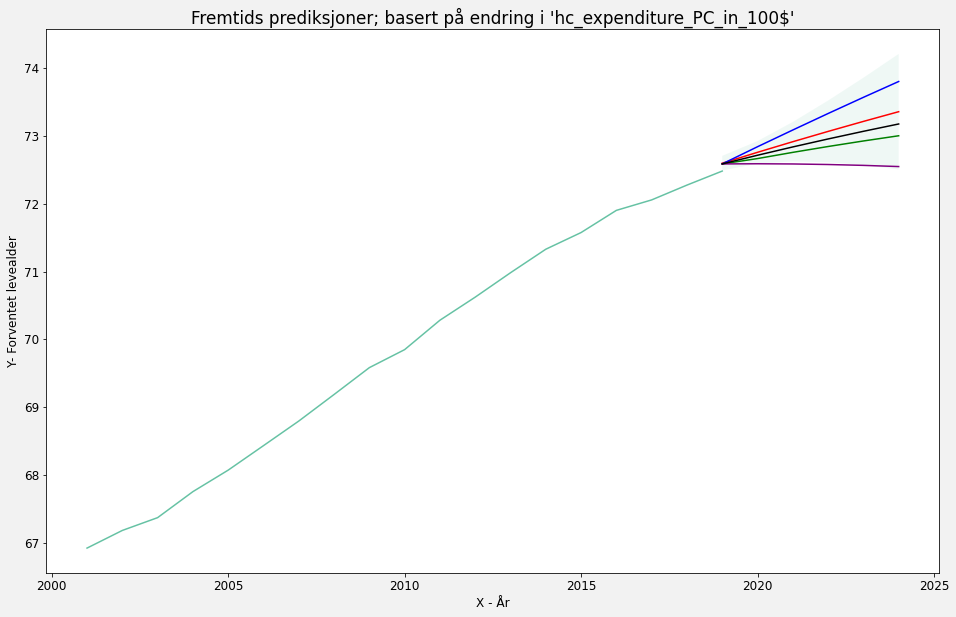

In [73]:
fig, ax = plt.subplots()

ax.plot(forecast["Years"], forecast["mean"], color="red")
ax.fill_between(forecast["Years"], forecast["mean_ci_lower"], forecast["mean_ci_upper"], alpha=.1)

ax.plot(forecast2["Years"], forecast2["mean"], color="blue")

ax.plot(forecast3["Years"], forecast3["mean"], color="green")

ax.plot(forecast4["Years"], forecast4["mean"], color="purple")

ax.plot(forecast5["Years"], forecast5["mean"], color="black")

LE_mean["Life_expectancy"].plot(ax=ax)
plt.ylabel("Y- Forventet levealder")
plt.xlabel("X - År")
plt.title("Fremtids prediksjoner; basert på endring i 'hc_expenditure_PC_in_100$'")
plt.show()

Denne modellen er laget som et eksempel på noen ekstreme scenarioer. Figuren bruker variabelen `hc_expenditure_PC_in_100$` som påvirker til å predikere hvordan gjennomsnittlig forventet levealder ville beveget seg gitt endringer i gjennomsnittlig utgifter til helsevesen i 100 dollar per person. Fargene og deres scenarioer er nærmere forklart under. Alle startverdiene er satt til 15.67 fordi det er utgangspunktet i 2019. <br>
Rød: Viser en prediksjon som matcher den eksisterende trenden i variabelen, som vil si en økning med 0.46 hvert år. <br>
Blå: Viser en prediksjon der vi øker verdien fire ganger fortere enn gjennomsnittsverdi, altså 1.84. Økning fører til nesten 1000 dollar høyere utgifter per person. <br>
Grønn: Viser en prediksjon der vi senker verdien av `hc_expenditure_PC_in_100$` med 0.46, likt som gjennomsnittsøkningen. <br>
Lilla: Viser en prediksjon der vi drastisk senker verdien fire ganger gjennomsnittsøkningen, altså en nedgang på 1,84. Dette tilsvarer en nedgang av utgifter på nesten 900 dollar per person. <br>
Svart: Viser en prediksjon der `hc_expenditure_PC_in_100$` ikke endres de neste 5 årene fra verdien 15.67. <br>
Den svakt synlige bakgrunnen er de nedre og øvre grensene basert på den mest realistiske modellen, den røde linjen. Den er inkludert for og kunne se om de ulike prediksjonene ligger innenfor "rimelighetens grenser". <br>

Det er et par momenter som burde påpekes. Ved uendrede verdier for `hc_expenditure_PC_in_100$` vil forventet levealder fortsatt stige. Dette illustreres best ved den svarte linjen som ikke har noen gitte endringer i den avhengige variabelen, men likevel har en signifikant stigning. Dette kan også forklare at vår grønne linje, som har en synkende utgiftsverdi, har en positiv utvikling i forventet levealder. <br>

Denne modellen er derimot langt fra perfekt. Effekten `hc_expenditure_PC_in_100$` har på forventet levealder er basert på gjennomsnittsverdier av de to variablene. Dette er ikke nødvendigvis en dårlig måte å fremstille effekten, men den kan ikke anses å være veldig kausal for konkrete beslutninger.
Vi vet også at basert på tidligere multiple regresjoner så finnes det andre variabler som forklarer endringen i forventet levealder. Noe av dette ser vi i den generelle økningen av verdien, noe finnes også gjemt i effekten til figurens uavhengige variabel. Til tross for noen svakhetene er dette en modell og analyse jeg inkluderte fordi den trekker frem en rekke interessante sammenligninger. Den bidrar også til å belyse oppgaven fra andre måter enn kun en vanlig multippel regresjon klarer.

## Konklusjon; resultater, kritikk og evaluering  


#### Resultater

I denne oppgaven har jeg sett på problemstillingen: <br>

*Hvilken effekt har investering i offentlig og privat helsevesen på forventet levealder?* <br>

Jeg håndterte denne oppgaven som en undersøkelse der jeg gjennomførte en rekke analyser for å komme frem til om økte utgifter til helsevesen ga utslag på forventet levealder. Resultatene har vært mange og ulike, men generelt har modellene konkludert i en positiv liten effekt knyttet til min valgte påvirkende variabel `hc_expenditure_PC_in_$`. Tidlig skalerte jeg variabelen til å gjelde hver 100 dollar, for å lettere se effektene. Jeg hadde en rekke ulike variabler i datasettet som på ulik måte beskrev mengden utgifter til helsevesenet. Jeg valgte å bruke variabelen fordi det var lettere å måle eller tolke den direkte effekten av en eller flere dollar og fordi det bedre beskriver summen som legges inn i helsevesenet enn prosent av BNP gjør, som er en betydelig mer abstrakt måleenhet.

I de multiple regresjonene var målet å spesifisere en effekt assosiert med variabelen. Måten jeg skulle oppnå dette på var å sette den i samme analyse som en rekke andre variabler jeg mener kunne påvirke og fremheve den faktiske effekten. Det å fastslå en tallverdi for effekten ble vanskelig, fordi koeffesienten, som normalt er en god måleenhet på dette, hadde store endringer. Til gjengjeld fikk vi gjennom testene bekreftet en gjennomgående positiv, men liten effekt og noen tydelig bevis på at variabelen har en korrelasjon med forventet levealder. 

I diagnostikk og modellevaluering gjennomførte jeg regresjonssimulasjon med den enkle regresjonsmodellen for å vurdere hvor passende modellen var til dataen og konkluderte med at dette var brukbart og ikke grunnlag for å vurdere en upassende modell. Residual figuren målte den multiple regresjonens avstand fra den lineære regresjonslinjen. Her så vi en tydelig spredning som påviser en dårligere passform til dataene. Ikke bare var avstanden til regresjonslinjene relativt stor, men det var også høy variasjon knyttet til residualavstanden, noe som er tegn på en dårlig tilpasset regresjonsmodell. Jeg forbedret regresjonsmodellen fra disse resultatene, men fikk også her lave koeffisientverdier som tilsvarer liten sammenheng.

I tidsrekkeregresjonen ser vi en tydelig trend at selv uten endringer i vår uavhengige variabel vil forventet levealder øke. Dette kan tolkes som at det ligger en rekke underliggende variabler som bidrar til å øke forventet levealder. Det er liten grunn til å anta at ikke andre variabler som teknologisk utvikling og adapsjon, menneskerettigheter, demokrati, kriminalitet, fattigdom, sysselsetingsgrad og lønnsnivå, for å nevne noen, spiller en direkte eller indirekte rolle i at forventet levealder generelt har en økende trend på global basis. Likevel kan vi heller ikke på grunnlag av tidsrekkeregresjonen utelukke at denne økningen i forventet levealder skyldes et allerede tilfredsstillende nivå av utgifter til helsevesen, som øker forventet levealder hvis det vedvares. 

Jeg klarte ikke gjennom denne oppgaven å konkludere i noen tallverdi som oppsumerer effekten, men kan si den er betydelig mindre enn jeg i utgangspunktet antok. Uavhengig av hvor signifikant denne effekten er så kan jeg fastslå at den er utelukkende positiv og at det finnes få ulemper knyttet til forventet levealder hvis man øker utgiftene til helsevesenet.

#### Kritikk og vurderinger

Når det gjennomføres statistiske analyser er det svært viktig å være klar over eventuelle feilsteg og variabler som kan forstyrre eller ugyldiggjøre resultatene. I denne oppgaven finnes det flere slike forhold som burde tas stilling til og drøftes for å bedre kunne vurdere gyldigheten av resultatene. <br>
Det første vi skal se på er valg av variabler. Denne oppgaven er satt sammen av en rekke ulike datasett, alle hentet fra samme nettside ourworldindata.org. Dette gjør at jeg lettere kan være trygg på at dataen overlapper internt under sammenslåing av datasettene. Når det kommer til de ulike variabelen jeg samlet inn finnes det antakelig annen data som er bedre for denne analysen. Jeg valgte å prioritere en sikrere sammenslåing av datasettene. <br>

Når det kommer til valg av metoder og analyser er det også her noen momenter som burde fremheves. Oppgaven hadde noen overordnede rammer for innhold og det kan vurderes om mine valg av analyser var riktige. <br>
For meg virket mulitipel- og tidsrekkeregresjon som de mest forklarende analysene gitt mitt datasett. Om dette var riktig avgjørelse kan drøftes mer omfattende. Problemstillingen min innebærer å se på forholdet mellom to variabler, gitt dataen var det også naturlig å se på utviklingen over tid. Multippel regresjon er også en essensiell analyse for å avdekke eventuelle forvirrende og underliggende variabler som forskyver de enkle regresjonsresultatene.

Oppgaven har også inneholdt en rekke ulike analyser for å teste passform, data og lignede. Det kan stilles kritiske spørsmål rundt både modellvalg og valg av data til de gitte modellene. Jeg valgte ut de modellene som etter min mening kunne bidra til å belyse ulike aspekter av dataen og være gode komplemetære til den generelle analysen.
